<h5>รายชื่อสมาชิก<h5>
<p> 1. วุฒิภัทร  วิวัฒนเจริญชัย 62090500421 </p>
<p> 2. นฤวดา   สนธิยานนท์   62090500431 </p>
<p> 3. ปวีณนุช    ปรีดา       62090500434 </p>
<p> 4. สุตาภัทร  ศรีสว่าง     62090500441 </p>
<p> 5. อภิชญา   จิไธสง      62090500442 </p>
<p> 6. โยษิตา   พรศิริอนันต์   62090500448 </p> 

In [1]:
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pylab import *
pd.options.mode.chained_assignment = None


### Function: UpDown 

In [2]:
#หุ้นขึ้นหรือลง
def generateUpDown(data):
    data['Updown'] = 0
    for i, j, k in zip(data['Close'], data['Close'].iloc[1:], range(0, len(data))):
        if i < j:
            data['Updown'].iloc[k] = 1 #ขึ้น
        elif i > j:
            data['Updown'].iloc[k] = 0  #ลง


### Function: Predict UpDown of Each Class

In [3]:
updownclass = []
zero_class = 0
one_class = 0
def PredictUpDownofEachClass(y_pred):
    global zero_class 
    global one_class 
    if y_pred[-1] == 0:
        print('Today predict is Down!')
    else:
        print('Today predict is UP!')
#     updownclass.append(y_pred[-1])
#     print(updownclass)
    
    
    if num_zeros < num_ones:
        updownclass.append(1)
        print('This classification is UP : ')
        print(updownclass)
        one_class = one_class+num_ones
        zero_class = zero_class+num_zeros
        print('one : ', one_class)
        print('zero : ', zero_class)
    else:
        updownclass.append(0)
        print('This classification is DOWN : ')
        print(updownclass)
        zero_class = zero_class+num_zeros
        one_class = one_class+num_ones
        print('one : ', one_class)
        print('zero : ', zero_class)

### Function: Predict All Class

In [4]:
def PredictAllClass():
    PredictUpDownClass = []
    print(updownclass)
    updownclass.pop(nums)
    
    for i in range(len(updownclass)):
        if updownclass[i] == 1 :
            PredictUpDownClass.append(1)
    Sum = sum(PredictUpDownClass)
    if Sum >= 2 :
        print('This Index is UP')
        print(updownclass)
    else:
        print('This Index is DOWN')
        print(updownclass)

### Function: Predict All Regress

In [5]:
zero_regress = 0
one_regress = 0

def PredictAllRegress(next_close, previous_close, y_pred):
    global zero_regress
    global one_regress

    if next_close > previous_close:
        print('Today predict is UP!')
        one_regress += 1
    else: 
        print('Today predict is DOWN!')
        zero_regress += 1
    
    
  
    for i in range (len(y_pred)):
        n = i + 1
        if n != (len(y_pred)):
            if y_pred[n] > y_pred[i]:
                one_regress += 1
            else:
                zero_regress += 1
        else:
            break

            
    if one_regress > zero_regress: 
        print('one: ', one_regress)
        print('zero: ', zero_regress)
        print('this Regression predict is UP')
        
    else:
        print('one: ', one_regress)
        print('zero: ', zero_regress)
        print('this Regression predict is DOWN')
        
   

        

### Function: Final Predict

In [6]:
def FinalPredict():
    global zero_class 
    global one_class 
    total_zero = zero_class + zero_regress
    total_one = one_class + one_regress  
    if total_zero > total_one:
        print('This stock should buy')
        print('zero_class: ',zero_class)
        print('one_class: ', one_class)
        print('zero_regress: ', zero_regress)
        print('one_regress: ', one_regress)
    else:
        print('This stock should sell')
        print('zero_class: ',zero_class)
        print('one_class: ', one_class)
        print('zero_regress: ', zero_regress)
        print('one_regress: ', one_regress)
   

### Function: Destroy min

In [7]:
nums = 0
def destroy_min():
    minimum = min(accuracy_f1_score)
    print(minimum)
    for i in range(len(accuracy_f1_score)):
        if accuracy_f1_score[i] == minimum:
            nums = i
    print(updownclass)
    print(accuracy_f1_score)

### Function: Accuracy Classification

In [8]:
accuracy_f1_score = []
def Accuracy_class(y_test, y_pred):
    pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
    pred_f1_score = metrics.f1_score(y_test, y_pred)
    pred_precision = metrics.precision_score(y_test, y_pred)

    print('Prediction Accuracy Score:', pred_accuracy )
    print('Prediction recall Score:', pred_recall )
    print("Prediction F1_score: ", pred_f1_score )
    print("Prediction Precision: ", pred_precision)

    print('----- Confution Matrix ------')
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    accuracy_f1_score.append(pred_accuracy)
    print(accuracy_f1_score)


### Function: Accuracy Regression

In [9]:
def Accuracy_regress(y_test, y_pred):
    mean_squared = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE: ", mean_squared) #RMSE
    mean_r = r2_score(y_test, y_pred)
    print("R2 Score: ", mean_r) #R2 Score Accuracy

### Function: Plot Graph ROC & AUC

In [10]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def visualize_roc_auc():
    plt.figure(figsize=(20,10))
    # generate a no skill prediction (majority class)
    bl_probs = [0 for _ in range(len(y_test))]

    # predict DTC probabilities
    dtc_probs = dtc.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    dtc_probs = dtc_probs[:, 1]

    # predict RF probabilities
    rf_probs = rf.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]

    # predict MLP probabilities
    mlp_probs = mlp.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    mlp_probs = mlp_probs[:, 1]
    
    # predict Logistic Regression probabilities
    lr_probs = lr.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    
    # calculate scores
    bl_auc = roc_auc_score(y_test, bl_probs)
    dtc_auc = roc_auc_score(y_test, dtc_probs)
    rf_auc  = roc_auc_score(y_test, rf_probs)
    mlp_auc = roc_auc_score(y_test, mlp_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('NoSkill: ROC AUC=%.3f' % bl_auc)
    print('DTC:     ROC AUC=%.3f' % dtc_auc)
    print('RF :     ROC AUC=%.3f' % rf_auc)
    print('MLP:     ROC AUC=%.3f' % mlp_auc)
    print('LGT:     ROC AUC=%.3f' % lr_auc)

    # calculate ROC curves to plt
    bl_fpr, bl_tpr, _ = roc_curve(y_test, bl_probs)
    dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
    rf_fpr,  rf_tpr, _  = roc_curve(y_test, rf_probs)
    mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    #
    # plot the roc curve for the models
    plt.plot(dtc_fpr, dtc_tpr, label='DT')
    plt.plot(rf_fpr,  rf_tpr, label='RF')
    plt.plot(mlp_fpr, mlp_tpr, label='MLP')
    plt.plot(lr_fpr, lr_tpr, label='LGT')
    plt.plot(bl_fpr, bl_tpr, linestyle='--', label='baseline')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # show the legend
    plt.legend()

    # show the plot
    plt.show()

### Function: Plot Graph Regression

In [11]:
def plotgraphReg(title, date, y, index, features, model):
    X_target = index.loc[:, features].values
    y_target = index.loc[:, ['future_close']].values
    X_target = sc.transform(X_target)
    # Plot outputs
    fig = plt.figure(figsize=(20,10))
    plt.plot(date[-360:],y[-360:], color="black", label="Future Close Price")
    plt.plot(date[-60:],y[-60:], color="green", label="Actual")
    plt.plot(date[-60:], model.predict(X_target), color="red", label="predicted")
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

### Function: Select Features

In [12]:
def selectFeature(indexs, target):
    selected_rfe = []
    from sklearn.feature_selection import RFE
    X = indexs.drop(["Updown","future_close","Close"], axis=1)  # Feature Matrix
    y = indexs[target]

    cols = list(X.columns)
    model = LinearRegression()

    # Initializing RFE model
    rfe = RFE(model)
    #, n_features_to_select=6

    # Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)

    # Fitting the data to model
    model.fit(X_rfe,y)
    temp = pd.Series(rfe.support_, index = cols)

    selected_features_rfe = temp[temp==True].index
    #print(selected_features_rfe)

    for i in range (len(selected_features_rfe)):
        selected_rfe.append(selected_features_rfe[i])

    return selected_rfe

In [13]:
#8 years
HSI  = pdr.get_data_yahoo("^HSI", start ="2014-01-01", end="2021-12-31")

In [14]:
#6 years
HSI  = pdr.get_data_yahoo("^HSI", start ="2016-01-01", end="2021-12-31")

<h2>HSI</h2>

In [15]:
#INDICATORS
HSI['MA']    = ta.MA(HSI['Close'], timeperiod=30, matype=0)
HSI['RSI14'] = ta.RSI(HSI['Close'], timeperiod=14)
HSI['MACD'], MACDSIGNAL , MACDHIST = ta.MACD(HSI['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
HSI['OBV']   = ta.OBV(HSI['Close'], HSI['Volume'])
HSI['ROC']   = ta.ROC(HSI['Close'], timeperiod=10)
HSI['W%R']   = ta.WILLR(HSI['High'], HSI['Low'], HSI['Close'], timeperiod=14)
HSI['ATR']   = ta.ATR(HSI['High'], HSI['Low'], HSI['Close'], timeperiod=14)

HSI['SMA50'] = ta.SMA(HSI['Close'], timeperiod=50)
HSI['SMA200'] = ta.SMA(HSI['Close'], timeperiod=200)

HSI['EMA50']   = ta.MA(HSI['Close'], timeperiod=50, matype=0)
HSI['EMA200']   = ta.MA(HSI['Close'], timeperiod=200, matype=0)

HSI['ADX']   = ta.ADX(HSI['High'], HSI['Low'], HSI['Close'], timeperiod=14)
HSI

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX
Date,,,,,,,,,,,,,,,,,,
2016-01-04,21794.839844,21227.609375,21782.619141,21327.119141,1.712095e+09,21327.119141,NaN,NaN,NaN,1.712095e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,21452.740234,21095.900391,21318.689453,21188.720703,1.484745e+09,21188.720703,NaN,NaN,NaN,2.273497e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,21199.619141,20947.300781,21142.630859,20980.810547,1.651083e+09,20980.810547,NaN,NaN,NaN,-1.423734e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,20826.439453,20323.970703,20772.599609,20333.339844,2.982004e+09,20333.339844,NaN,NaN,NaN,-4.405738e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,20596.419922,20324.619141,20491.880859,20453.710938,2.078133e+09,20453.710938,NaN,NaN,NaN,-2.327604e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,23802.769531,23451.929688,23675.259766,23766.689453,2.717890e+09,23766.689453,24934.368359,33.340479,-410.248137,1.813958e+11,-5.122885,-77.003434,392.328295,24912.934219,27193.132373,24912.934219,27193.132373,27.576825
2021-12-06,23628.300781,23314.970703,23420.439453,23349.380859,2.357403e+09,23349.380859,24841.613411,28.802137,-449.342383,1.790384e+11,-6.420333,-93.018423,396.570471,24895.491055,27159.011426,24895.491055,27159.011426,29.758262
2021-12-07,23989.779297,23512.500000,23704.509766,23983.660156,2.120329e+09,23983.660156,24773.126432,41.775170,-424.253288,1.811587e+11,-2.709441,-63.896912,413.986754,24884.944648,27125.196426,24884.944648,27125.196426,30.330581


In [16]:
HSI['future_close'] = HSI['Close'].shift(-1)
generateUpDown(HSI) #เพิ่ม column ว่าวันนั้นซื้อหรือไม่ซื้อ
HSI

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,21794.839844,21227.609375,21782.619141,21327.119141,1.712095e+09,21327.119141,NaN,NaN,NaN,1.712095e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21188.720703,0
2016-01-05,21452.740234,21095.900391,21318.689453,21188.720703,1.484745e+09,21188.720703,NaN,NaN,NaN,2.273497e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20980.810547,0
2016-01-06,21199.619141,20947.300781,21142.630859,20980.810547,1.651083e+09,20980.810547,NaN,NaN,NaN,-1.423734e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20333.339844,0
2016-01-07,20826.439453,20323.970703,20772.599609,20333.339844,2.982004e+09,20333.339844,NaN,NaN,NaN,-4.405738e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20453.710938,1
2016-01-08,20596.419922,20324.619141,20491.880859,20453.710938,2.078133e+09,20453.710938,NaN,NaN,NaN,-2.327604e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19888.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,23802.769531,23451.929688,23675.259766,23766.689453,2.717890e+09,23766.689453,24934.368359,33.340479,-410.248137,1.813958e+11,-5.122885,-77.003434,392.328295,24912.934219,27193.132373,24912.934219,27193.132373,27.576825,23349.380859,0
2021-12-06,23628.300781,23314.970703,23420.439453,23349.380859,2.357403e+09,23349.380859,24841.613411,28.802137,-449.342383,1.790384e+11,-6.420333,-93.018423,396.570471,24895.491055,27159.011426,24895.491055,27159.011426,29.758262,23983.660156,1
2021-12-07,23989.779297,23512.500000,23704.509766,23983.660156,2.120329e+09,23983.660156,24773.126432,41.775170,-424.253288,1.811587e+11,-2.709441,-63.896912,413.986754,24884.944648,27125.196426,24884.944648,27125.196426,30.330581,23996.869141,1


In [17]:
HSI = HSI.dropna() 
HSI1 = HSI.iloc[:, 3:4]
HSI2 = HSI.iloc[:, 6:21]
HSI  = pd.merge(HSI1, HSI2 ,on = 'Date')

HSI

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,
2016-10-26,23325.429688,23482.325781,48.234530,12.406181,3.232216e+10,-0.951569,-68.023650,290.150887,23361.136797,21205.021455,23361.136797,21205.021455,16.728353,23132.349609,0
2016-10-27,23132.349609,23477.050781,44.615356,-12.070710,3.077022e+10,-1.173583,-85.794640,294.432241,23365.133594,21214.047607,23365.133594,21214.047607,17.454841,22954.810547,0
2016-10-28,22954.810547,23468.352474,41.529676,-45.272864,2.955517e+10,-0.332114,-91.199642,295.544224,23366.013008,21222.878057,23366.013008,21222.878057,18.509983,22934.539062,0
2016-10-31,22934.539062,23459.815755,41.179470,-72.387116,2.825725e+10,-1.285962,-87.647483,293.736796,23368.708203,21232.646699,23368.708203,21232.646699,19.661263,23147.070312,1
2016-11-01,23147.070312,23453.531771,46.292969,-75.851492,2.979522e+10,0.475447,-56.570187,296.577862,23371.186406,21246.715352,23371.186406,21246.715352,19.721528,22810.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,23788.929688,25013.043034,33.602504,-396.872019,1.841137e+11,-6.045845,-76.138507,395.519715,24919.583242,27224.492529,24919.583242,27224.492529,25.404155,23766.689453,0
2021-12-03,23766.689453,24934.368359,33.340479,-410.248137,1.813958e+11,-5.122885,-77.003434,392.328295,24912.934219,27193.132373,24912.934219,27193.132373,27.576825,23349.380859,0
2021-12-06,23349.380859,24841.613411,28.802137,-449.342383,1.790384e+11,-6.420333,-93.018423,396.570471,24895.491055,27159.011426,24895.491055,27159.011426,29.758262,23983.660156,1


## Feature Scale -- HSI

In [18]:
selected_features_rfe = selectFeature(HSI, 'Updown')
selected_features_rfe

['RSI14', 'MACD', 'ROC', 'W%R', 'SMA200', 'ADX']

In [19]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = HSI.loc[:, selected_features_rfe]
y = HSI["Updown"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
# Feature Scale
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree -- HSI

In [21]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier
#paramether
dtc = DecisionTreeClassifier( max_depth = 3, criterion = 'gini', min_samples_leaf = 5 )
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [22]:
# Prediction
# เอา model มาใช้
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [23]:
y_pred[-1]

1

In [24]:
y_test

Date
2021-07-15    1
2018-01-11    1
2019-11-07    0
2016-11-02    0
2021-07-19    0
             ..
2020-05-05    1
2020-11-11    0
2020-12-01    0
2019-10-31    1
2020-07-14    1
Name: Updown, Length: 316, dtype: int64

In [25]:
accuracy_f1_score = []
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5063291139240507
Prediction recall Score: 0.48665620094191525
Prediction F1_score:  0.625
Prediction Precision:  0.5263157894736842
----- Confution Matrix ------
[[ 30 117]
 [ 39 130]]
[0.5063291139240507]


In [26]:
#predict up or down
updownclass = [] 
zero_class = 0
one_class = 0
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1]
one :  247
zero :  69


## Random Forest -- HSI

In [27]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 2, max_depth=15)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=2)

In [28]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [29]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5
Prediction recall Score: 0.494465241717989
Prediction F1_score:  0.5511363636363638
Prediction Precision:  0.5300546448087432
----- Confution Matrix ------
[[61 86]
 [72 97]]
[0.5063291139240507, 0.5]


In [30]:
#Predict up down this class
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is Down!
This classification is UP : 
[1, 1]
one :  430
zero :  202


## Artificial Neural Network (ANN) -- HSI

In [31]:
from sklearn.neural_network import MLPClassifier
#activation = "logistic"
mlp = MLPClassifier(max_iter=2000, random_state=0, activation = "logistic")
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=2000, random_state=0)

In [32]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5348101265822784
Prediction recall Score: 0.5
Prediction F1_score:  0.6969072164948453
Prediction Precision:  0.5348101265822784
----- Confution Matrix ------
[[  0 147]
 [  0 169]]
[0.5063291139240507, 0.5, 0.5348101265822784]


In [34]:
#predict up down this class
#num_zeros = 10000
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1, 1]
one :  746
zero :  202


## Logistic Regression -- HSI

In [35]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [36]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [37]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5221518987341772
Prediction recall Score: 0.48860846113593365
Prediction F1_score:  0.6847599164926932
Prediction Precision:  0.5290322580645161
----- Confution Matrix ------
[[  1 146]
 [  5 164]]
[0.5063291139240507, 0.5, 0.5348101265822784, 0.5221518987341772]


In [38]:
#predict up down this class
#num_zeros = 10000
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1, 1, 1]
one :  1056
zero :  208


In [39]:
destroy_min()

0.5
[1, 1, 1, 1]
[0.5063291139240507, 0.5, 0.5348101265822784, 0.5221518987341772]


In [40]:
PredictAllClass()

[1, 1, 1, 1]
This Index is UP
[1, 1, 1]


## ROC AUC -- HSI

NoSkill: ROC AUC=0.500
DTC:     ROC AUC=0.494
RF :     ROC AUC=0.488
MLP:     ROC AUC=0.508
LGT:     ROC AUC=0.503


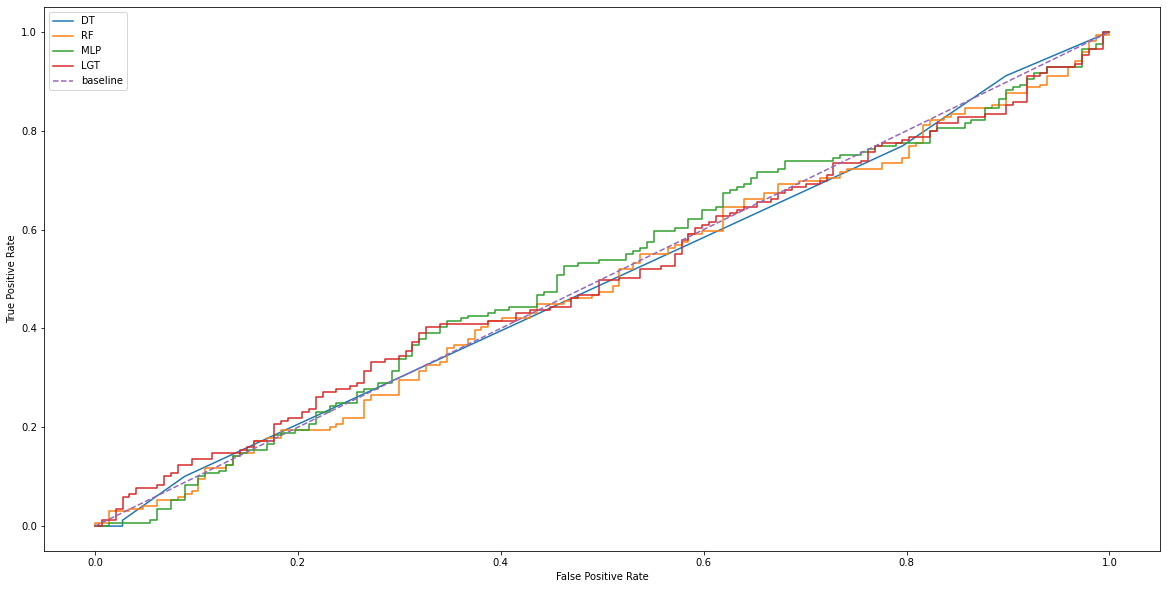

In [41]:
visualize_roc_auc()

<h2>Regression -- HSI</h2>

In [42]:
selected_features_rfe = selectFeature(HSI, 'future_close')

In [43]:
X = HSI.loc[:, selected_features_rfe]
y = HSI["future_close"]
X

,MA,RSI14,MACD,ROC,EMA50,ADX
Date,,,,,,
2016-10-26,23482.325781,48.234530,12.406181,-0.951569,23361.136797,16.728353
2016-10-27,23477.050781,44.615356,-12.070710,-1.173583,23365.133594,17.454841
2016-10-28,23468.352474,41.529676,-45.272864,-0.332114,23366.013008,18.509983
2016-10-31,23459.815755,41.179470,-72.387116,-1.285962,23368.708203,19.661263
2016-11-01,23453.531771,46.292969,-75.851492,0.475447,23371.186406,19.721528
...,...,...,...,...,...,...
2021-12-02,25013.043034,33.602504,-396.872019,-6.045845,24919.583242,25.404155
2021-12-03,24934.368359,33.340479,-410.248137,-5.122885,24912.934219,27.576825
2021-12-06,24841.613411,28.802137,-449.342383,-6.420333,24895.491055,29.758262


In [44]:
# Split the dataset into the Training set and Test set
#

from sklearn.model_selection import train_test_split #test_size = สัดส่วน

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Linear Regression -- HSI</h2>

In [45]:
Allclose = HSI['Close']

In [46]:
Allclose

Date
2016-10-26    23325.429688
2016-10-27    23132.349609
2016-10-28    22954.810547
2016-10-31    22934.539062
2016-11-01    23147.070312
                  ...     
2021-12-02    23788.929688
2021-12-03    23766.689453
2021-12-06    23349.380859
2021-12-07    23983.660156
2021-12-08    23996.869141
Name: Close, Length: 1263, dtype: float64

In [47]:
## Linear Regression -- HSI
lr = LinearRegression().fit(X_train, y_train)

In [48]:
y_pred = lr.predict(X_test)
y_pred

array([27782.79277932, 31333.93426137, 27881.38029531, 22800.55070406,
       27495.21746567, 28145.20250721, 26572.77293167, 28813.4097947 ,
       29870.34542086, 25209.65735906, 26914.87784458, 29067.8980292 ,
       28815.79520715, 32909.23029261, 25707.87415723, 27844.11827879,
       25832.35518111, 27068.13689919, 26590.97223493, 22165.23055409,
       25577.73936273, 26811.91830968, 27111.73261317, 25633.97660115,
       25853.42613239, 30517.9258119 , 27505.69317978, 29305.00323309,
       26690.42850222, 28182.28228927, 27034.49346425, 26384.41725226,
       30361.78376076, 24170.50425948, 25104.54352655, 24419.26934614,
       23182.5745392 , 24787.87386953, 27718.08066685, 21722.50477005,
       25454.78736412, 22886.70903351, 29481.25038573, 27046.63224868,
       28915.2071372 , 27871.49562858, 27238.83005306, 23751.47917354,
       28562.44344415, 23168.7447549 , 25491.77539891, 28410.54070751,
       25300.54382529, 30710.11666555, 26715.34308135, 26891.35984765,
      

In [49]:
y_test

Date
2021-07-15    28004.679688
2018-01-11    31412.539062
2019-11-07    27651.140625
2016-11-02    22683.509766
2021-07-19    27259.250000
                  ...     
2020-05-05    24137.480469
2020-11-11    26169.380859
2020-12-01    26532.580078
2019-10-31    27100.759766
2020-07-14    25481.580078
Name: future_close, Length: 316, dtype: float64

In [50]:
HSI['future_close']

Date
2016-10-26    23132.349609
2016-10-27    22954.810547
2016-10-28    22934.539062
2016-10-31    23147.070312
2016-11-01    22810.500000
                  ...     
2021-12-02    23766.689453
2021-12-03    23349.380859
2021-12-06    23983.660156
2021-12-07    23996.869141
2021-12-08    24245.539062
Name: future_close, Length: 1263, dtype: float64

In [51]:
Accuracy_regress(y_test, y_pred)

RMSE:  352.6298649042024
R2 Score:  0.9767684929646105


In [52]:
previous_close = y_pred[-2]
previous_close

26849.782983133828

In [53]:
next_close = y_pred[-1]
next_close

25631.731753646036

In [55]:
PredictAllRegress(next_close, previous_close, y_pred)

Today predict is DOWN!
one:  312
zero:  320
this Regression predict is DOWN


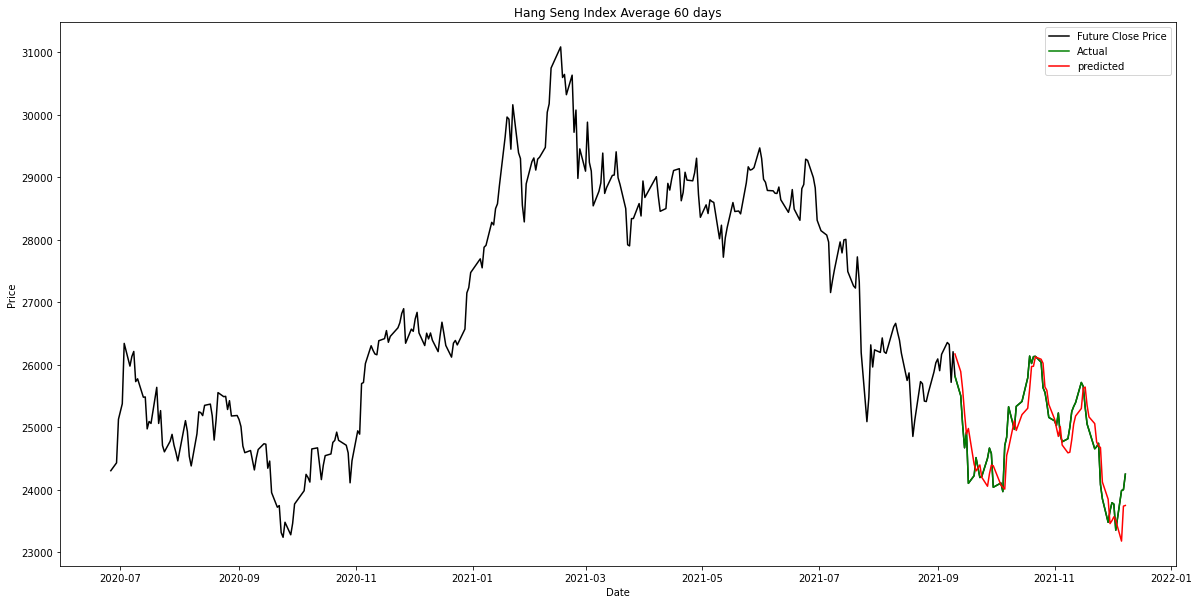

In [56]:
plotgraphReg('Hang Seng Index Average 60 days', HSI.index, y , HSI.iloc[-60:], selected_features_rfe, lr)

<h2> AdaBoostRegressor -- Regression -- HSI</h2>

In [57]:
selected_features_rfe = selectFeature(HSI, 'future_close')

In [58]:
X = HSI.loc[:, selected_features_rfe]
y = HSI["Close"]
X

,MA,RSI14,MACD,ROC,EMA50,ADX
Date,,,,,,
2016-10-26,23482.325781,48.234530,12.406181,-0.951569,23361.136797,16.728353
2016-10-27,23477.050781,44.615356,-12.070710,-1.173583,23365.133594,17.454841
2016-10-28,23468.352474,41.529676,-45.272864,-0.332114,23366.013008,18.509983
2016-10-31,23459.815755,41.179470,-72.387116,-1.285962,23368.708203,19.661263
2016-11-01,23453.531771,46.292969,-75.851492,0.475447,23371.186406,19.721528
...,...,...,...,...,...,...
2021-12-02,25013.043034,33.602504,-396.872019,-6.045845,24919.583242,25.404155
2021-12-03,24934.368359,33.340479,-410.248137,-5.122885,24912.934219,27.576825
2021-12-06,24841.613411,28.802137,-449.342383,-6.420333,24895.491055,29.758262


In [59]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=50,learning_rate=0.1,random_state=0).fit(X_train, y_train)

In [61]:
y_pred = ada.predict(X_test)
y_pred

array([28005.67780139, 29691.2206552 , 26649.83596021, 23092.49929199,
       26957.63826578, 28248.61147837, 26551.06962096, 28485.22394153,
       29654.8260445 , 26742.57792638, 26942.36877624, 28857.63638071,
       28485.22394153, 30973.27555116, 25641.34963942, 28005.67780139,
       25294.42050058, 26486.41995555, 25294.42050058, 23015.44825676,
       25761.40962765, 27138.34575076, 26496.54296875, 25775.30301339,
       26018.2333565 , 29654.8260445 , 26496.54296875, 28714.51821733,
       27097.83185003, 28427.46059438, 27962.18216414, 25294.42050058,
       29904.64600634, 24374.05999244, 24803.71463419, 24695.6270538 ,
       23118.95522837, 24832.67089002, 27308.75803481, 23015.44825676,
       25294.42050058, 23136.70388105, 29511.54730805, 26395.33325311,
       28858.70880971, 27104.79103944, 26496.54296875, 23960.2835984 ,
       28485.22394153, 23296.20412109, 26660.20243253, 28485.22394153,
       25294.42050058, 30751.6905128 , 26395.33325311, 27244.78204449,
      

In [62]:
Accuracy_regress(y_test, y_pred)

RMSE:  634.0440478082911
R2 Score:  0.9272732719122547


In [63]:
previous_close = y_pred[-2]
previous_close

26594.05564888277

In [64]:
next_close = y_pred[-1]
next_close

24950.88827740148

In [65]:
PredictAllRegress(next_close, previous_close, y_pred)

Today predict is DOWN!
one:  473
zero:  475
this Regression predict is DOWN


In [66]:
FinalPredict()

This stock should sell
zero_class:  208
one_class:  1056
zero_regress:  475
one_regress:  473


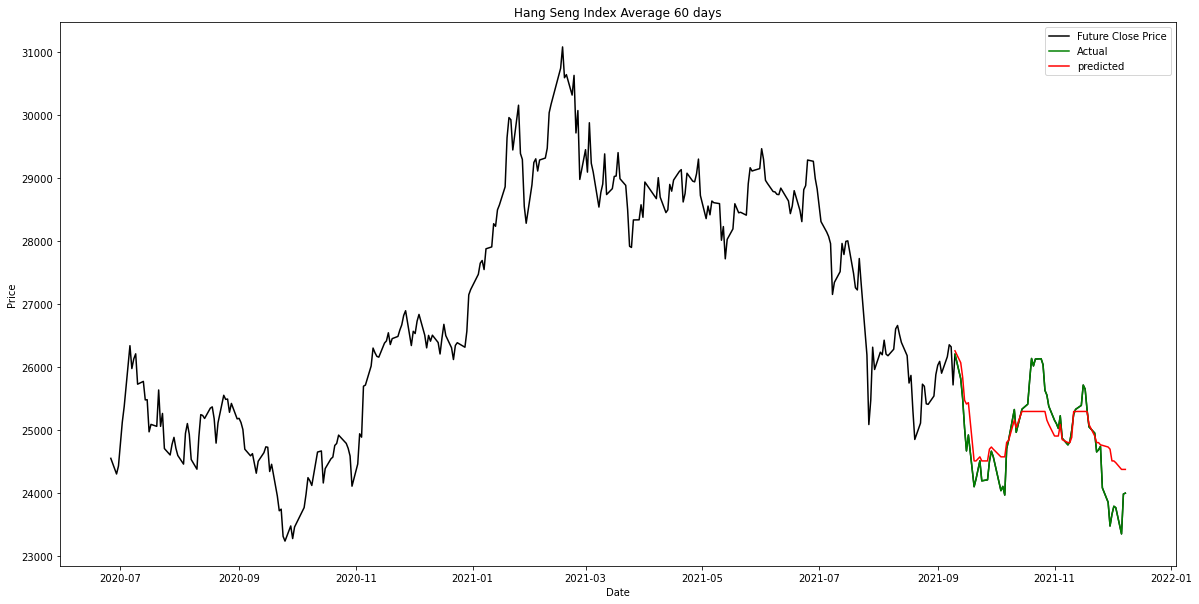

In [67]:
plotgraphReg('Hang Seng Index Average 60 days', HSI.index, y , HSI.iloc[-60:], selected_features_rfe, ada)

In [68]:
N225 = pdr.get_data_yahoo("^N225", start ="2014-01-01", end="2021-12-31")

In [68]:
N225 = pdr.get_data_yahoo("^N225", start ="2016-01-01", end="2021-12-31")

## N225

In [69]:
#INDICATORS
N225['MA']    = ta.MA(N225['Close'], timeperiod=30, matype=0)
N225['RSI14'] = ta.RSI(N225['Close'], timeperiod=14)
N225['MACD'], MACDSIGNAL , MACDHIST = ta.MACD(N225['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
N225['OBV']   = ta.OBV(N225['Close'], N225['Volume'])
N225['ROC']   = ta.ROC(N225['Close'], timeperiod=10)
N225['W%R']   = ta.WILLR(N225['High'], N225['Low'], N225['Close'], timeperiod=14)
N225['ATR']   = ta.ATR(N225['High'], N225['Low'], N225['Close'], timeperiod=14)

N225['SMA50'] = ta.SMA(HSI['Close'], timeperiod=50)
N225['SMA200'] = ta.SMA(HSI['Close'], timeperiod=200)

N225['EMA50']   = ta.MA(N225['Close'], timeperiod=50, matype=0)
N225['EMA200']   = ta.MA(N225['Close'], timeperiod=200, matype=0)


N225['ADX']   = ta.ADX(N225['High'], N225['Low'], N225['Close'], timeperiod=14)
N225

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX
Date,,,,,,,,,,,,,,,,,,
2016-01-04,18951.119141,18394.429688,18818.580078,18450.980469,140200000.0,18450.980469,NaN,NaN,NaN,1.402000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,18547.380859,18327.519531,18398.759766,18374.000000,132300000.0,18374.000000,NaN,NaN,NaN,7.900000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,18469.380859,18064.300781,18410.570312,18191.320312,142200000.0,18191.320312,NaN,NaN,NaN,-1.343000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,18172.039062,17767.339844,18139.769531,17767.339844,168000000.0,17767.339844,NaN,NaN,NaN,-3.023000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,17975.310547,17509.640625,17562.230469,17697.960938,184300000.0,17697.960938,NaN,NaN,NaN,-4.866000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,28029.570312,27588.609375,27841.050781,28029.570312,71900000.0,28029.570312,29105.386523,37.293649,-312.166744,5.525100e+09,-5.301219,-81.412251,440.040891,24912.934219,27193.132373,29015.001133,28923.250020,23.072641
2021-12-06,28081.039062,27693.910156,28069.960938,27927.369141,61700000.0,27927.369141,29079.346159,36.217520,-341.325035,5.463400e+09,-6.113454,-85.720319,436.261464,24895.491055,27159.011426,28980.760508,28915.072217,24.584119
2021-12-07,28618.460938,27961.660156,28138.820312,28455.599609,78300000.0,28455.599609,29067.704492,45.044164,-318.142063,5.541700e+09,-4.428377,-62.651647,454.463630,24884.944648,27125.196426,28944.896289,28909.749863,24.277181


In [70]:
N225['future_close'] = N225['Close'].shift(-1)
generateUpDown(N225) #เพิ่ม column ว่าวันนั้นซื้อหรือไม่ซื้อ
N225

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,18951.119141,18394.429688,18818.580078,18450.980469,140200000.0,18450.980469,NaN,NaN,NaN,1.402000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18374.000000,0
2016-01-05,18547.380859,18327.519531,18398.759766,18374.000000,132300000.0,18374.000000,NaN,NaN,NaN,7.900000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18191.320312,0
2016-01-06,18469.380859,18064.300781,18410.570312,18191.320312,142200000.0,18191.320312,NaN,NaN,NaN,-1.343000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17767.339844,0
2016-01-07,18172.039062,17767.339844,18139.769531,17767.339844,168000000.0,17767.339844,NaN,NaN,NaN,-3.023000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17697.960938,0
2016-01-08,17975.310547,17509.640625,17562.230469,17697.960938,184300000.0,17697.960938,NaN,NaN,NaN,-4.866000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17218.960938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,28029.570312,27588.609375,27841.050781,28029.570312,71900000.0,28029.570312,29105.386523,37.293649,-312.166744,5.525100e+09,-5.301219,-81.412251,440.040891,24912.934219,27193.132373,29015.001133,28923.250020,23.072641,27927.369141,0
2021-12-06,28081.039062,27693.910156,28069.960938,27927.369141,61700000.0,27927.369141,29079.346159,36.217520,-341.325035,5.463400e+09,-6.113454,-85.720319,436.261464,24895.491055,27159.011426,28980.760508,28915.072217,24.584119,28455.599609,1
2021-12-07,28618.460938,27961.660156,28138.820312,28455.599609,78300000.0,28455.599609,29067.704492,45.044164,-318.142063,5.541700e+09,-4.428377,-62.651647,454.463630,24884.944648,27125.196426,28944.896289,28909.749863,24.277181,28860.619141,1


In [71]:
N225 = N225.dropna() 
N225_1 = N225.iloc[:, 3:4]
N225_2 = N225.iloc[:, 6:21]
N225  = pd.merge(N225_1, N225_2, on = 'Date')
N225

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,
2017-08-16,19729.279297,19980.963346,42.164696,-80.007426,1.670200e+09,-1.283461,-64.807182,152.578930,26424.103516,24311.226357,20005.607578,19224.196958,12.169319,19702.630859,0
2017-08-17,19702.630859,19969.972721,41.257037,-84.796451,1.598300e+09,-1.879519,-65.539994,145.942572,26449.726719,24331.320312,20000.062187,19235.883862,12.457330,19470.410156,0
2017-08-18,19470.410156,19949.598698,34.323177,-106.106924,1.502600e+09,-2.790166,-94.516884,154.771032,26470.072344,24350.896416,19989.778008,19246.276714,13.783807,19393.130859,0
2017-08-21,19393.130859,19929.567708,32.373284,-127.758697,1.427300e+09,-2.802676,-96.326534,153.993023,26499.005156,24371.895762,19979.455430,19256.560269,15.259839,19383.839844,0
2017-08-22,19383.839844,19911.392708,32.136903,-144.007562,1.356800e+09,-3.350890,-97.088166,148.372149,26529.996563,24394.231416,19966.867031,19266.247417,16.644124,19434.640625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,27753.369141,29146.252539,32.241270,-280.815493,5.453200e+09,-6.517581,-93.267226,439.970119,24919.583242,27224.492529,29051.203945,28930.631816,21.244934,28029.570312,1
2021-12-03,28029.570312,29105.386523,37.293649,-312.166744,5.525100e+09,-5.301219,-81.412251,440.040891,24912.934219,27193.132373,29015.001133,28923.250020,23.072641,27927.369141,0
2021-12-06,27927.369141,29079.346159,36.217520,-341.325035,5.463400e+09,-6.113454,-85.720319,436.261464,24895.491055,27159.011426,28980.760508,28915.072217,24.584119,28455.599609,1


## Feature Selection -- N225

In [72]:
selected_features_rfe = selectFeature(N225, 'Updown')
selected_features_rfe

['RSI14', 'MACD', 'ROC', 'W%R', 'ATR', 'ADX']

In [73]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = N225.loc[:, selected_features_rfe]
y = N225["Updown"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [74]:
# Feature Scale
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree -- N225

In [75]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier
#paramether
dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 0.35, splitter="random")
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.35, splitter='random')

In [76]:
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [77]:
y_test

Date
2021-11-19    1
2020-10-08    0
2017-10-03    1
2021-12-08    0
2021-05-20    1
             ..
2017-12-08    1
2019-08-02    0
2021-08-19    0
2018-09-06    0
2019-11-18    0
Name: Updown, Length: 249, dtype: int64

In [78]:
accuracy_f1_score = []
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5421686746987951
Prediction recall Score: 0.5
Prediction F1_score:  0.7031249999999999
Prediction Precision:  0.5421686746987951
----- Confution Matrix ------
[[  0 114]
 [  0 135]]
[0.5421686746987951]


In [79]:

#predict up or down
updownclass = [] 
#accuracy = []
zero_class = 0
one_class = 0
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)


Today predict is UP!
This classification is UP : 
[1]
one :  249
zero :  0


## Random Forest -- N225

In [80]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=42)

In [81]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [82]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5301204819277109
Prediction recall Score: 0.5127680311890839
Prediction F1_score:  0.6237942122186496
Prediction Precision:  0.5511363636363636
----- Confution Matrix ------
[[35 79]
 [38 97]]
[0.5421686746987951, 0.5301204819277109]


In [83]:

num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is Down!
This classification is UP : 
[1, 1]
one :  425
zero :  73


## Artificial Neural Network (ANN) -- N225

In [84]:
from sklearn.neural_network import MLPClassifier
#activation = "logistic"
mlp = MLPClassifier(max_iter=2000, random_state=0, activation = "logistic")
mlp.fit(X_train, y_train)


MLPClassifier(activation='logistic', max_iter=2000, random_state=0)

In [85]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [86]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5140562248995983
Prediction recall Score: 0.48226120857699806
Prediction F1_score:  0.6572237960339944
Prediction Precision:  0.5321100917431193
----- Confution Matrix ------
[[ 12 102]
 [ 19 116]]
[0.5421686746987951, 0.5301204819277109, 0.5140562248995983]


In [87]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1, 1]
one :  643
zero :  104


##  Logistic Regression -- N225

In [88]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [89]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [90]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5180722891566265
Prediction recall Score: 0.5064327485380117
Prediction F1_score:  0.5918367346938775
Prediction Precision:  0.5471698113207547
----- Confution Matrix ------
[[42 72]
 [48 87]]
[0.5421686746987951, 0.5301204819277109, 0.5140562248995983, 0.5180722891566265]


In [91]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is Down!
This classification is UP : 
[1, 1, 1, 1]
one :  802
zero :  194


In [92]:
destroy_min()

0.5140562248995983
[1, 1, 1, 1]
[0.5421686746987951, 0.5301204819277109, 0.5140562248995983, 0.5180722891566265]


In [93]:
PredictAllClass()

[1, 1, 1, 1]
This Index is UP
[1, 1, 1]


## ROC AUC -- N225

NoSkill: ROC AUC=0.500
DTC:     ROC AUC=0.553
RF :     ROC AUC=0.519
MLP:     ROC AUC=0.460
LGT:     ROC AUC=0.508


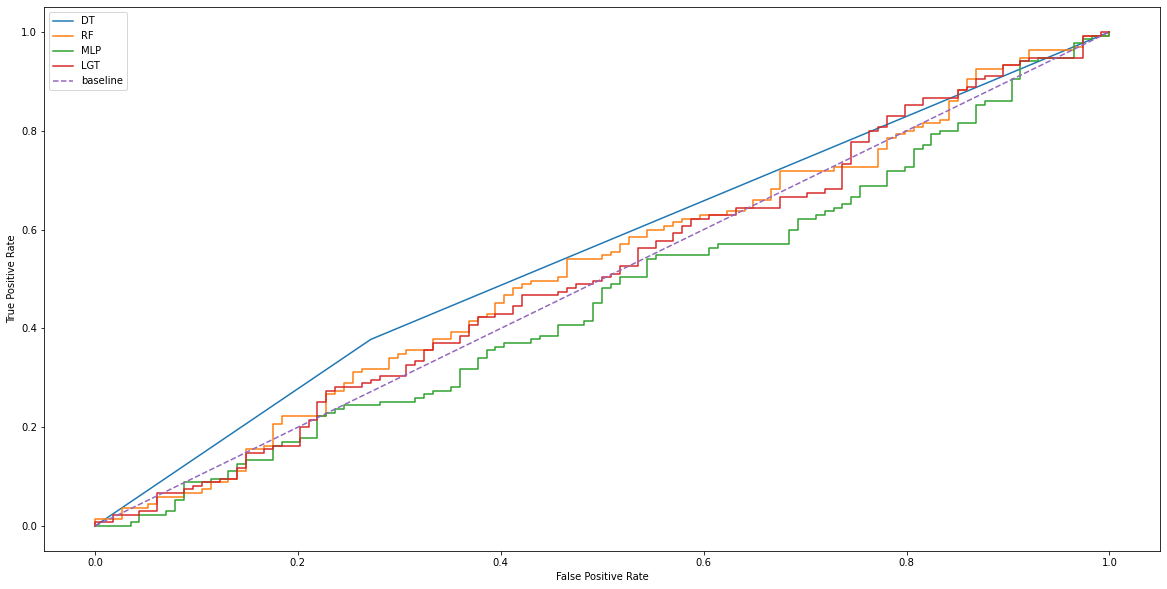

In [94]:
visualize_roc_auc()

## Regresssion--N225

In [95]:
selected_features_rfe = selectFeature(N225, 'future_close')
selected_features_rfe

['MA', 'RSI14', 'MACD', 'ROC', 'W%R', 'ADX']

In [96]:
X = N225.loc[:, selected_features_rfe]
y = N225["future_close"]
X

,MA,RSI14,MACD,ROC,W%R,ADX
Date,,,,,,
2017-08-16,19980.963346,42.164696,-80.007426,-1.283461,-64.807182,12.169319
2017-08-17,19969.972721,41.257037,-84.796451,-1.879519,-65.539994,12.457330
2017-08-18,19949.598698,34.323177,-106.106924,-2.790166,-94.516884,13.783807
2017-08-21,19929.567708,32.373284,-127.758697,-2.802676,-96.326534,15.259839
2017-08-22,19911.392708,32.136903,-144.007562,-3.350890,-97.088166,16.644124
...,...,...,...,...,...,...
2021-12-02,29146.252539,32.241270,-280.815493,-6.517581,-93.267226,21.244934
2021-12-03,29105.386523,37.293649,-312.166744,-5.301219,-81.412251,23.072641
2021-12-06,29079.346159,36.217520,-341.325035,-6.113454,-85.720319,24.584119


In [97]:
# Split the dataset into the Training set and Test set
#

from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression-- N225

In [98]:
## Linear Regression -- N225
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred

array([29568.93555907, 23751.92938631, 20698.9582398 , 28574.26293861,
       28123.15693188, 21161.7401892 , 22347.0600874 , 22679.59935542,
       18979.69225488, 21635.76461491, 21208.68627864, 21597.54437874,
       23413.03324973, 22302.89068926, 28894.42524748, 29575.62839607,
       22045.18504787, 21206.30651646, 23063.46893937, 19271.50622326,
       22886.07438379, 20540.21191939, 22543.38471907, 22036.48815476,
       23644.16105975, 26920.49816641, 21163.02610227, 22435.62012056,
       21391.77327984, 29626.79816804, 28385.59722528, 23297.36299587,
       23096.11602521, 23473.73197134, 19995.28544713, 28601.79579232,
       28745.57699017, 22051.75722563, 21739.92979072, 27811.66398705,
       29581.87962502, 21697.93711122, 20631.07016842, 21104.70963679,
       22947.89246951, 23433.5166318 , 27707.03471537, 20116.5395966 ,
       28843.98160226, 29978.87615675, 21440.11328923, 23348.02889295,
       21152.52478359, 26868.35697301, 28864.61720437, 22383.15919932,
      

In [99]:
Accuracy_regress(y_test, y_pred)

RMSE:  383.79412402934696
R2 Score:  0.9860999579459244


In [100]:
previous_close = y_pred[-2]
previous_close

22576.475248692415

In [101]:
next_close = y_pred[-1]
next_close

23436.852927550717

In [102]:
PredictAllRegress(next_close, previous_close, y_pred)

Today predict is UP!
one:  599
zero:  598
this Regression predict is UP


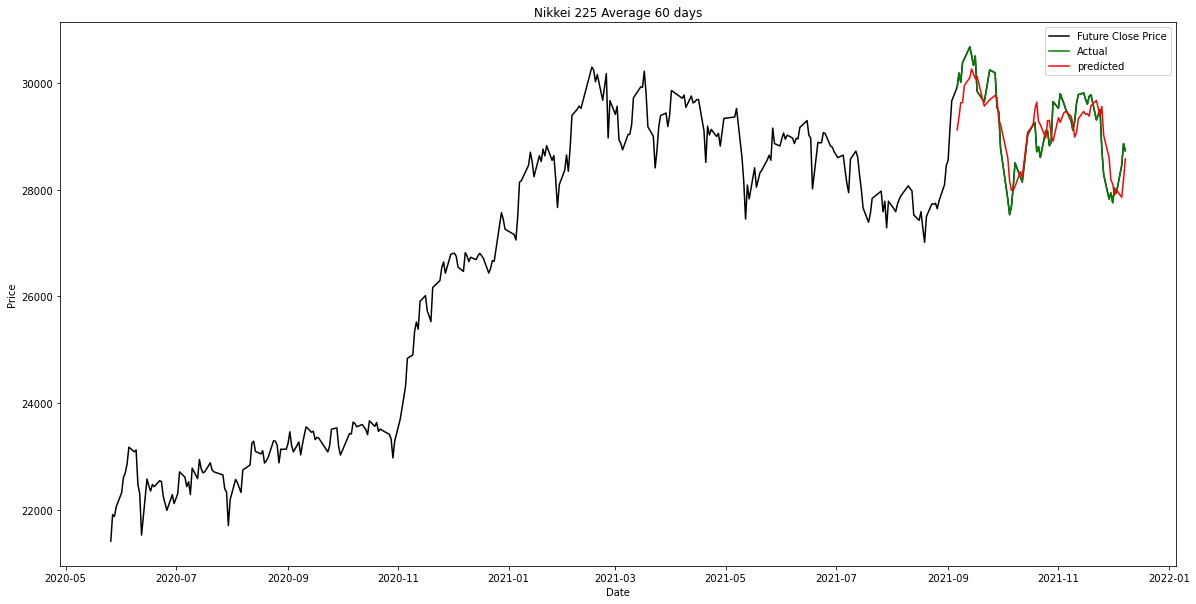

In [103]:
plotgraphReg('Nikkei 225 Average 60 days', N225.index, y , N225.iloc[-60:], selected_features_rfe, lr)

## AdaBoostRegressor -- N225

In [104]:
selected_features_rfe = selectFeature(N225, 'future_close')
selected_features_rfe

['MA', 'RSI14', 'MACD', 'ROC', 'W%R', 'ADX']

In [105]:
X = N225.loc[:, selected_features_rfe]
y = N225["future_close"]
X

,MA,RSI14,MACD,ROC,W%R,ADX
Date,,,,,,
2017-08-16,19980.963346,42.164696,-80.007426,-1.283461,-64.807182,12.169319
2017-08-17,19969.972721,41.257037,-84.796451,-1.879519,-65.539994,12.457330
2017-08-18,19949.598698,34.323177,-106.106924,-2.790166,-94.516884,13.783807
2017-08-21,19929.567708,32.373284,-127.758697,-2.802676,-96.326534,15.259839
2017-08-22,19911.392708,32.136903,-144.007562,-3.350890,-97.088166,16.644124
...,...,...,...,...,...,...
2021-12-02,29146.252539,32.241270,-280.815493,-6.517581,-93.267226,21.244934
2021-12-03,29105.386523,37.293649,-312.166744,-5.301219,-81.412251,23.072641
2021-12-06,29079.346159,36.217520,-341.325035,-6.113454,-85.720319,24.584119


In [106]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=600).fit(X_train, y_train)
y_pred = ada.predict(X_test)
y_pred


array([29375.80736737, 23099.3782993 , 20843.6546778 , 28539.42477829,
       28159.1673584 , 20925.34361169, 22262.81493472, 22484.42422589,
       20248.04109003, 21890.11819586, 21890.11819586, 21951.70636664,
       22985.4069446 , 21696.75117784, 29277.92487614, 29246.57783203,
       22194.27562635, 20813.67077029, 22734.28417506, 20046.95892961,
       22580.72392537, 20774.65733157, 22469.44987161, 22178.4148877 ,
       23088.8680057 , 26672.82534951, 20781.51662354, 22051.85302998,
       21312.43942973, 29463.61360677, 28901.89668642, 22783.38980171,
       22178.4148877 , 23056.86087665, 20762.33714299, 28297.80908203,
       29250.77174193, 21944.83762811, 21667.94662905, 28391.81516335,
       29332.95402644, 21479.03055367, 20781.51662354, 21023.31482422,
       22722.85396248, 23296.11436632, 28271.26011029, 20774.65733157,
       29281.1194894 , 29477.44263393, 21458.64210937, 22734.28417506,
       21847.52940341, 26990.07767428, 29270.00240796, 21892.04686725,
      

In [108]:
Accuracy_regress(y_test, y_pred)

RMSE:  497.5443981531108
R2 Score:  0.9766394451708642


In [109]:
previous_close = y_pred[-2]
previous_close

22414.68454005282

In [110]:
next_close = y_pred[-1]
next_close

22873.225174249386

In [111]:
PredictAllRegress(next_close, previous_close, y_pred)

Today predict is UP!
one:  726
zero:  720
this Regression predict is UP


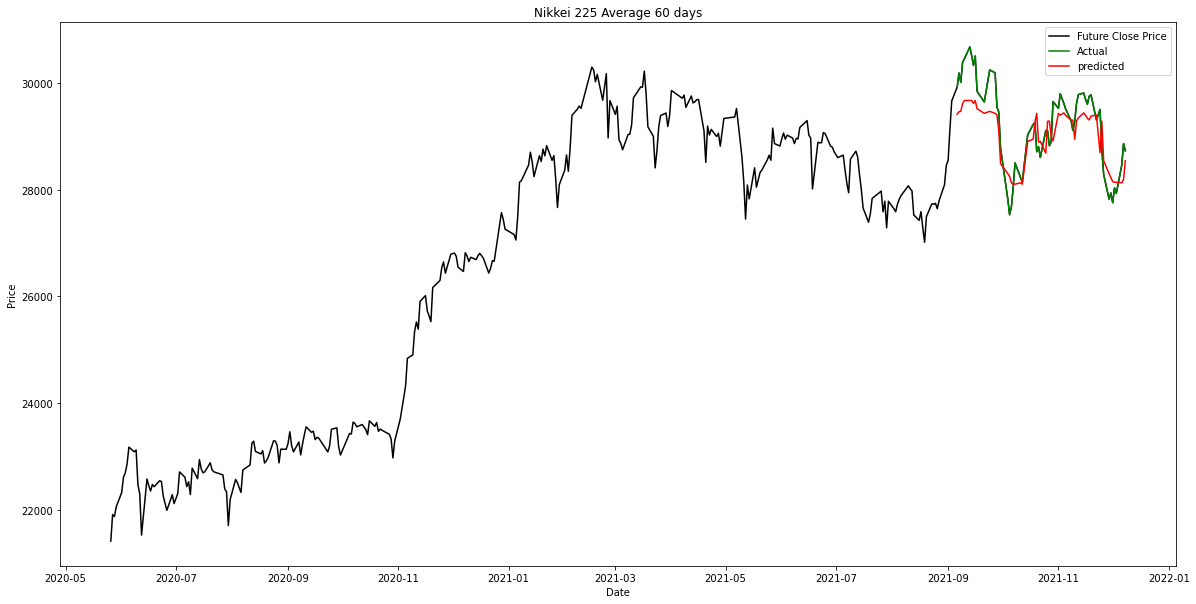

In [112]:
plotgraphReg('Nikkei 225 Average 60 days', N225.index, y , N225.iloc[-60:], selected_features_rfe, ada)

In [113]:
FinalPredict()

This stock should sell
zero_class:  194
one_class:  802
zero_regress:  720
one_regress:  726


## SSE

In [114]:
SSE  = pdr.get_data_yahoo("000001.SS", start ="2014-01-01", end="2021-12-31")

In [115]:
SSE  = pdr.get_data_yahoo("000001.SS", start ="2016-01-01", end="2021-12-31")

In [116]:
#INDICATORS
SSE['MA']    = ta.MA(SSE['Close'], timeperiod=30, matype=0)
SSE['RSI14'] = ta.RSI(SSE['Close'], timeperiod=14)
SSE['MACD'], MACDSIGNAL , MACDHIST = ta.MACD(SSE['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
SSE['OBV']   = ta.OBV(SSE['Close'], SSE['Volume'])
SSE['ROC']   = ta.ROC(SSE['Close'], timeperiod=10)
SSE['W%R']   = ta.WILLR(SSE['High'], SSE['Low'], SSE['Close'], timeperiod=14)
SSE['ATR']   = ta.ATR(SSE['High'], SSE['Low'], SSE['Close'], timeperiod=14)

SSE['SMA50'] = ta.SMA(HSI['Close'], timeperiod=50)
SSE['SMA200'] = ta.SMA(HSI['Close'], timeperiod=200)

SSE['EMA50']   = ta.MA(SSE['Close'], timeperiod=50, matype=0)
SSE['EMA200']   = ta.MA(SSE['Close'], timeperiod=200, matype=0)


SSE['ADX']   = ta.ADX(SSE['High'], SSE['Low'], SSE['Close'], timeperiod=14)
SSE

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX
Date,,,,,,,,,,,,,,,,,,
2016-01-04,3538.688965,3295.740967,3536.589111,3296.258057,184400,3296.258057,NaN,NaN,NaN,184400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,3328.138916,3189.604980,3196.650879,3287.710938,266900,3287.710938,NaN,NaN,NaN,-82500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,3362.974121,3288.933105,3291.195068,3361.840088,238900,3361.840088,NaN,NaN,NaN,156400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,3309.656982,3115.885010,3309.656982,3125.001953,70600,3125.001953,NaN,NaN,NaN,85800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,3235.450928,3056.877930,3194.625000,3186.412109,286400,3186.412109,NaN,NaN,NaN,372200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,3608.469971,3573.209961,3576.449951,3607.429932,377600,3607.429932,3548.102409,61.147474,9.466918,25226800.0,1.321767,-1.090647,32.126287,24912.934219,27193.132373,3563.726445,3527.939696,14.994060
2021-12-06,3626.129883,3586.810059,3615.239990,3589.310059,418700,3589.310059,3547.417407,56.182322,10.194615,24808100.0,0.201837,-32.578214,32.640111,24895.491055,27159.011426,3563.370845,3528.376952,15.220563
2021-12-07,3614.219971,3572.570068,3611.219971,3595.090088,403800,3595.090088,3547.332414,57.371411,11.109656,25211900.0,0.167201,-27.464039,33.283667,24884.944648,27125.196426,3562.993247,3528.870752,14.862399


In [117]:
SSE['future_close'] = SSE['Close'].shift(-1)
generateUpDown(SSE) 
SSE

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,3538.688965,3295.740967,3536.589111,3296.258057,184400,3296.258057,NaN,NaN,NaN,184400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3287.710938,0
2016-01-05,3328.138916,3189.604980,3196.650879,3287.710938,266900,3287.710938,NaN,NaN,NaN,-82500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361.840088,1
2016-01-06,3362.974121,3288.933105,3291.195068,3361.840088,238900,3361.840088,NaN,NaN,NaN,156400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3125.001953,0
2016-01-07,3309.656982,3115.885010,3309.656982,3125.001953,70600,3125.001953,NaN,NaN,NaN,85800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3186.412109,1
2016-01-08,3235.450928,3056.877930,3194.625000,3186.412109,286400,3186.412109,NaN,NaN,NaN,372200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3016.704102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,3608.469971,3573.209961,3576.449951,3607.429932,377600,3607.429932,3548.102409,61.147474,9.466918,25226800.0,1.321767,-1.090647,32.126287,24912.934219,27193.132373,3563.726445,3527.939696,14.994060,3589.310059,0
2021-12-06,3626.129883,3586.810059,3615.239990,3589.310059,418700,3589.310059,3547.417407,56.182322,10.194615,24808100.0,0.201837,-32.578214,32.640111,24895.491055,27159.011426,3563.370845,3528.376952,15.220563,3595.090088,1
2021-12-07,3614.219971,3572.570068,3611.219971,3595.090088,403800,3595.090088,3547.332414,57.371411,11.109656,25211900.0,0.167201,-27.464039,33.283667,24884.944648,27125.196426,3562.993247,3528.870752,14.862399,3637.570068,1


In [118]:
SSE = SSE.dropna() 
SSE1 = SSE.iloc[:, 3:4]
SSE2 = SSE.iloc[:, 6:21]
SSE  = pd.merge(SSE1, SSE2, on = 'Date')
SSE


,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,
2017-08-16,3246.450928,3241.167782,51.548974,10.618610,8399300.0,-1.175199,-56.341582,30.703511,26424.103516,24311.226357,3209.716426,3183.580095,16.848956,3268.429932,1
2017-08-17,3268.429932,3243.033976,56.484900,11.131482,8602900.0,-0.137462,-35.345783,30.130974,26449.726719,24331.320312,3212.078345,3184.340685,15.829518,3268.724121,1
2017-08-18,3268.724121,3244.726213,56.548708,11.429918,8794000.0,0.203645,-35.064753,29.906827,26470.072344,24350.896416,3214.284829,3185.122555,14.747437,3286.906006,1
2017-08-21,3286.906006,3247.202010,60.412281,12.983886,8980100.0,0.227140,-17.696213,29.113119,26499.005156,24371.895762,3217.225410,3186.035735,14.217094,3290.226074,1
2017-08-22,3290.226074,3250.108276,61.092598,14.318267,9166600.0,0.254520,-3.504873,28.357551,26529.996563,24394.231416,3219.955073,3186.984406,13.945275,3287.705078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,3573.840088,3547.274748,54.176579,6.555478,24849200.0,1.509074,-32.239910,31.885231,24919.583242,27224.492529,3564.702246,3527.489087,15.321140,3607.429932,1
2021-12-03,3607.429932,3548.102409,61.147474,9.466918,25226800.0,1.321767,-1.090647,32.126287,24912.934219,27193.132373,3563.726445,3527.939696,14.994060,3589.310059,0
2021-12-06,3589.310059,3547.417407,56.182322,10.194615,24808100.0,0.201837,-32.578214,32.640111,24895.491055,27159.011426,3563.370845,3528.376952,15.220563,3595.090088,1


## Feature Selection -- Classification --SSE

In [119]:
selected_features_rfe = selectFeature(SSE, 'Updown')
selected_features_rfe

['RSI14', 'MACD', 'ROC', 'W%R', 'ATR', 'ADX']

In [120]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = SSE.loc[:, selected_features_rfe]
y = SSE["Updown"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [121]:
# Feature Scale
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree -- SSE

In [122]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier
#paramether
dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 0.35, splitter="random")
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.35, splitter='random')

In [123]:
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [124]:
accuracy_f1_score = []
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.4921259842519685
Prediction recall Score: 0.5
Prediction F1_score:  0.6596306068601583
Prediction Precision:  0.4921259842519685
----- Confution Matrix ------
[[  0 129]
 [  0 125]]
[0.4921259842519685]


In [125]:

#predict up or down
updownclass = [] 
#accuracy = []
zero_class = 0
one_class = 0
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)


Today predict is UP!
This classification is UP : 
[1]
one :  254
zero :  0


## Random Forest -- SSE

In [126]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [127]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [128]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.4763779527559055
Prediction recall Score: 0.484
Prediction F1_score:  0.6453333333333333
Prediction Precision:  0.484
----- Confution Matrix ------
[[  0 129]
 [  4 121]]
[0.4921259842519685, 0.4763779527559055]


In [129]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1]
one :  504
zero :  4


## Artificial Neural Network (ANN) -- SSE

In [130]:

from sklearn.neural_network import MLPClassifier
#activation = "logistic"
mlp = MLPClassifier(max_iter=2000, random_state=0, activation = "logistic")
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=2000, random_state=0)

In [131]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [132]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.4921259842519685
Prediction recall Score: 0.5
Prediction F1_score:  0.6596306068601583
Prediction Precision:  0.4921259842519685
----- Confution Matrix ------
[[  0 129]
 [  0 125]]
[0.4921259842519685, 0.4763779527559055, 0.4921259842519685]


In [133]:

num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1, 1]
one :  758
zero :  4


## Logistic Regression

In [134]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [135]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [136]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.49606299212598426
Prediction recall Score: 0.5035038759689923
Prediction F1_score:  0.6559139784946236
Prediction Precision:  0.4939271255060729
----- Confution Matrix ------
[[  4 125]
 [  3 122]]
[0.4921259842519685, 0.4763779527559055, 0.4921259842519685, 0.49606299212598426]


In [137]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1, 1, 1]
one :  1005
zero :  11


In [138]:
destroy_min()

0.4763779527559055
[1, 1, 1, 1]
[0.4921259842519685, 0.4763779527559055, 0.4921259842519685, 0.49606299212598426]


In [139]:
PredictAllClass()

[1, 1, 1, 1]
This Index is UP
[1, 1, 1]


## ROC AUC --SSE

NoSkill: ROC AUC=0.500
DTC:     ROC AUC=0.500
RF :     ROC AUC=0.512
MLP:     ROC AUC=0.568
LGT:     ROC AUC=0.564


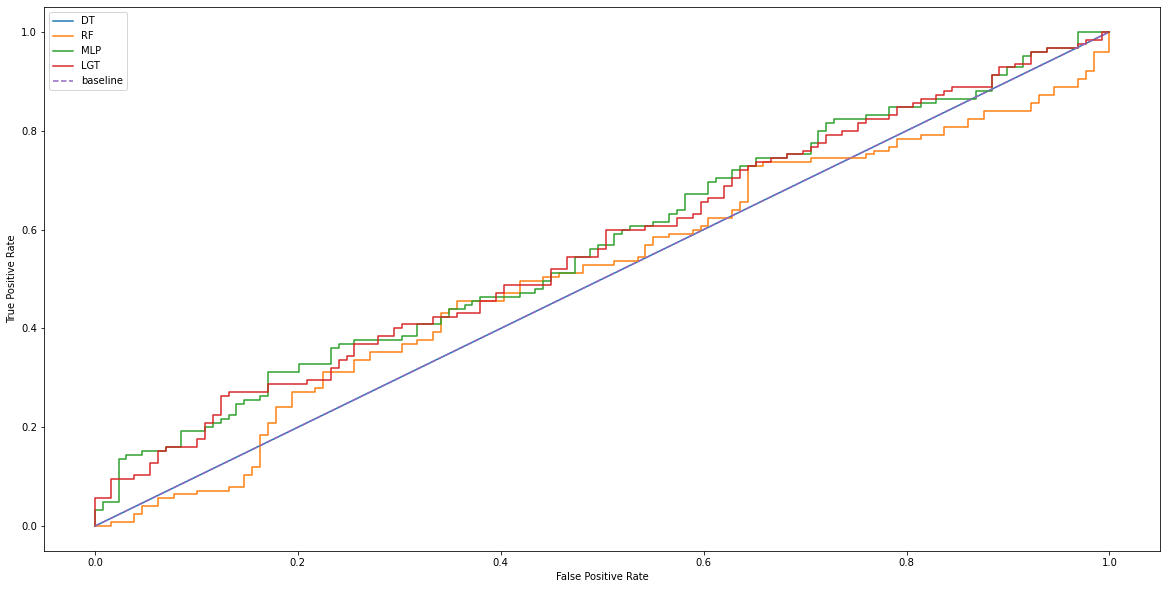

In [140]:
visualize_roc_auc()

## Regression -- SSE

In [141]:
selected_features_rfe = selectFeature(SSE, 'future_close')
selected_features_rfe

['MA', 'RSI14', 'MACD', 'ROC', 'ATR', 'EMA50']

In [142]:
X = SSE.loc[:, selected_features_rfe]
y = SSE["future_close"]
X

,MA,RSI14,MACD,ROC,ATR,EMA50
Date,,,,,,
2017-08-16,3241.167782,51.548974,10.618610,-1.175199,30.703511,3209.716426
2017-08-17,3243.033976,56.484900,11.131482,-0.137462,30.130974,3212.078345
2017-08-18,3244.726213,56.548708,11.429918,0.203645,29.906827,3214.284829
2017-08-21,3247.202010,60.412281,12.983886,0.227140,29.113119,3217.225410
2017-08-22,3250.108276,61.092598,14.318267,0.254520,28.357551,3219.955073
...,...,...,...,...,...,...
2021-12-02,3547.274748,54.176579,6.555478,1.509074,31.885231,3564.702246
2021-12-03,3548.102409,61.147474,9.466918,1.321767,32.126287,3563.726445
2021-12-06,3547.417407,56.182322,10.194615,0.201837,32.640111,3563.370845


In [143]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Linear Regression -- SSE

In [144]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred


array([2746.37309973, 3227.04339936, 3525.35400119, 2929.37638913,
       3563.81474157, 3268.21770474, 2707.52067876, 3368.8566574 ,
       3334.27638495, 3031.98157365, 2904.78626277, 3477.18383346,
       3443.67981081, 3291.05373871, 3445.62734569, 3069.31951166,
       3228.04613741, 3513.00036018, 3248.17161066, 2826.39346675,
       3532.40238492, 3608.75735083, 3580.7331192 , 2738.30854296,
       2804.7796282 , 2875.4611463 , 2980.25527784, 3300.86823361,
       3395.6769687 , 3575.47822728, 3414.57799053, 3440.86769117,
       3606.72954486, 2926.62537425, 2825.49366892, 3324.82966857,
       3438.35570621, 2864.66108441, 3101.50612076, 2838.43573172,
       3350.47206756, 2800.69629889, 3454.50336734, 2702.61312807,
       3274.71487854, 2887.03870951, 2931.25879165, 3509.39908574,
       2830.08682595, 2948.7742431 , 2831.15767785, 2611.51450262,
       3535.25864456, 3375.95754926, 3648.70347234, 3574.70853098,
       2656.30911114, 3408.86983488, 3467.36299559, 2879.52704

In [145]:
Accuracy_regress(y_test, y_pred)

RMSE:  43.699036064377566
R2 Score:  0.9810933449907144


In [146]:
previous_close = y_pred[-2]
previous_close

2876.373387255959

In [147]:
next_close = y_pred[-1]
next_close

3026.9929884683847

In [148]:
PredictAllRegress(next_close, previous_close, y_pred)

Today predict is UP!
one:  863
zero:  837
this Regression predict is UP


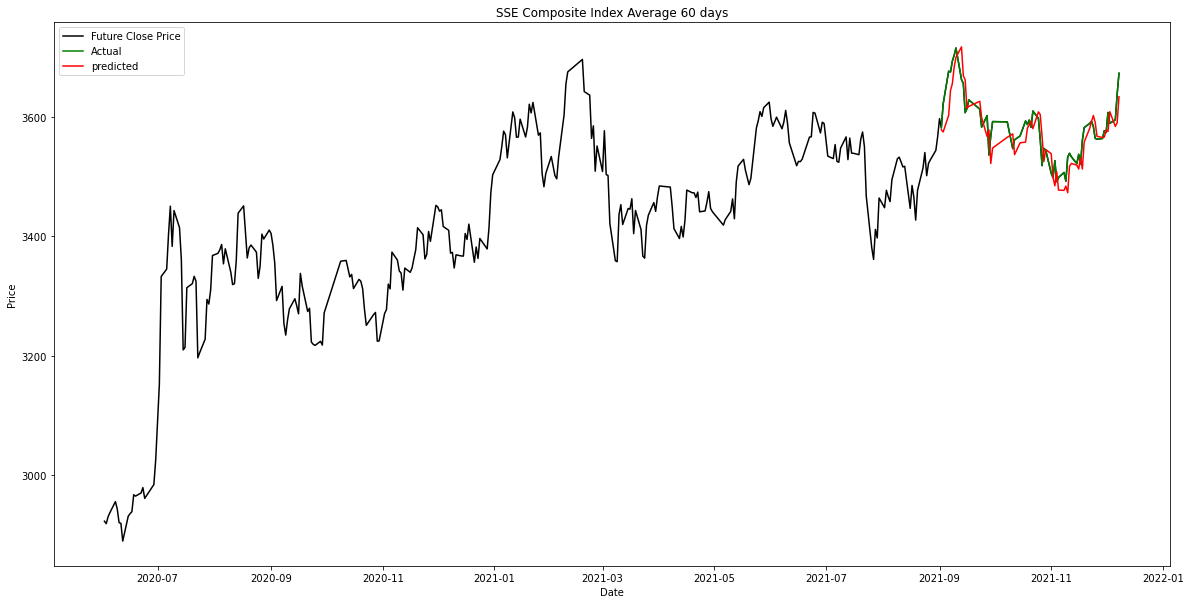

In [149]:
plotgraphReg('SSE Composite Index Average 60 days', SSE.index, y , SSE.iloc[-60:], selected_features_rfe, lr)

## AdaBoostRegressor-- SSE

In [150]:
X = SSE.loc[:, selected_features_rfe]
y = SSE["future_close"]
X

,MA,RSI14,MACD,ROC,ATR,EMA50
Date,,,,,,
2017-08-16,3241.167782,51.548974,10.618610,-1.175199,30.703511,3209.716426
2017-08-17,3243.033976,56.484900,11.131482,-0.137462,30.130974,3212.078345
2017-08-18,3244.726213,56.548708,11.429918,0.203645,29.906827,3214.284829
2017-08-21,3247.202010,60.412281,12.983886,0.227140,29.113119,3217.225410
2017-08-22,3250.108276,61.092598,14.318267,0.254520,28.357551,3219.955073
...,...,...,...,...,...,...
2021-12-02,3547.274748,54.176579,6.555478,1.509074,31.885231,3564.702246
2021-12-03,3548.102409,61.147474,9.466918,1.321767,32.126287,3563.726445
2021-12-06,3547.417407,56.182322,10.194615,0.201837,32.640111,3563.370845


In [151]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = SSE.loc[:, selected_features_rfe]
y = SSE["future_close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor().fit(X_train, y_train)

In [153]:
y_pred = ada.predict(X_test)
y_pred

array([2774.56838744, 3288.26017107, 3506.27405441, 2940.75826227,
       3547.23190175, 3231.90348816, 2766.5217786 , 3376.65898713,
       3356.02303138, 3016.38623277, 2931.07459463, 3488.4044459 ,
       3412.40216696, 3302.07018462, 3473.54403076, 3157.20515951,
       3262.43091272, 3449.68891602, 3307.60943685, 2826.56044515,
       3506.27405441, 3545.35006474, 3523.43570463, 2768.61300364,
       2782.84556924, 2915.81032435, 2960.12032412, 3316.58434703,
       3428.58362237, 3502.85824355, 3376.65898713, 3364.11589978,
       3547.05191756, 2862.99604604, 2827.99523482, 3333.36764384,
       3389.84306111, 2866.37280732, 3056.69344721, 2887.09396973,
       3362.59350768, 2805.05734923, 3449.68891602, 2739.35830931,
       3280.18412918, 2915.81032435, 2916.25493086, 3488.4044459 ,
       2840.89618686, 2956.65293315, 2827.99523482, 2631.30128933,
       3506.27405441, 3364.31291781, 3548.28346761, 3535.75538918,
       2741.28874171, 3380.87079875, 3474.96567524, 2915.81032

In [154]:
Accuracy_regress(y_test, y_pred)

RMSE:  53.54913124704642
R2 Score:  0.9716093167600842


In [155]:
previous_close = y_pred[-2]
previous_close

2827.995234818892

In [156]:
next_close = y_pred[-1]
next_close

3109.5823928975615

In [157]:
PredictAllRegress(next_close, previous_close, y_pred)

Today predict is UP!
one:  995
zero:  959
this Regression predict is UP


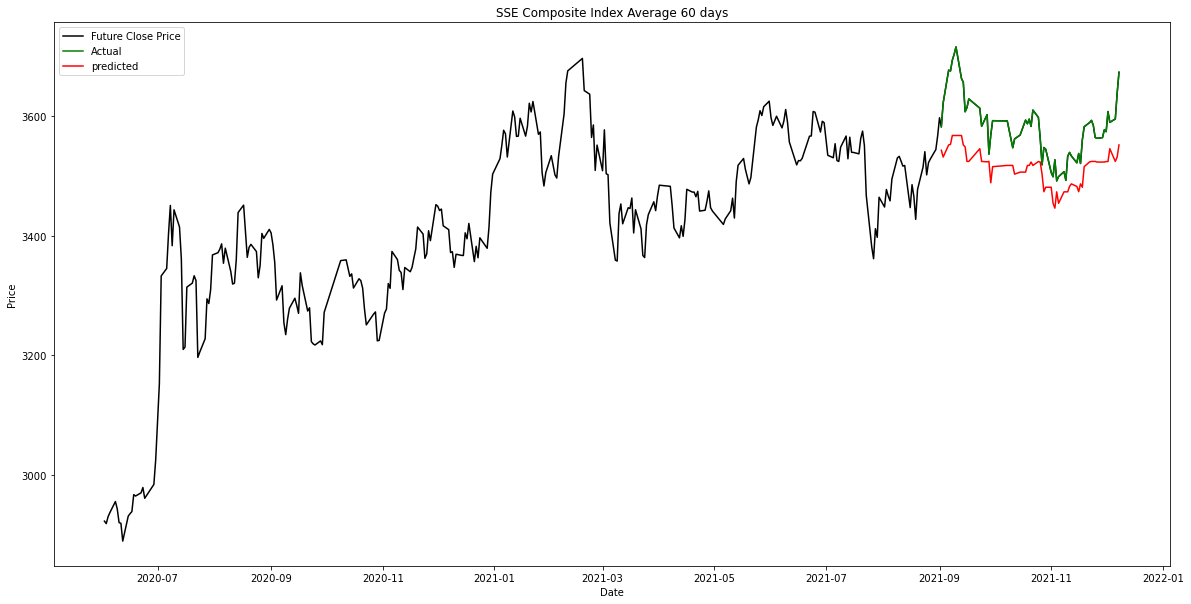

In [158]:
plotgraphReg('SSE Composite Index Average 60 days', SSE.index, y , SSE.iloc[-60:], selected_features_rfe, ada)

In [159]:
FinalPredict()

This stock should sell
zero_class:  11
one_class:  1005
zero_regress:  959
one_regress:  995


## DJI

In [160]:
DJI  = pdr.get_data_yahoo("^DJI", start ="2014-01-01", end="2021-12-31")

In [161]:
DJI  = pdr.get_data_yahoo("^DJI", start ="2016-01-01", end="2021-12-31")

In [162]:
#INDICATORS
DJI['MA']    = ta.MA(DJI['Close'], timeperiod=30, matype=0)
DJI['RSI14'] = ta.RSI(DJI['Close'], timeperiod=14)
DJI['MACD'], MACDSIGNAL , MACDHIST = ta.MACD(DJI['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
DJI['OBV']   = ta.OBV(DJI['Close'], DJI['Volume'])
DJI['ROC']   = ta.ROC(DJI['Close'], timeperiod=10)
DJI['W%R']   = ta.WILLR(DJI['High'], DJI['Low'], DJI['Close'], timeperiod=14)
DJI['ATR']   = ta.ATR(DJI['High'], DJI['Low'],DJI['Close'], timeperiod=14)

DJI['SMA50'] = ta.SMA(DJI['Close'], timeperiod=50)
DJI['SMA200'] = ta.SMA(DJI['Close'], timeperiod=200)

DJI['EMA50']   = ta.MA(DJI['Close'], timeperiod=50, matype=0)
DJI['EMA200']   = ta.MA(DJI['Close'], timeperiod=200, matype=0)

DJI['ADX']   = ta.ADX(DJI['High'], DJI['Low'], DJI['Close'], timeperiod=14)
DJI

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX
Date,,,,,,,,,,,,,,,,,,
2015-12-31,17590.660156,17421.160156,17590.660156,17425.029297,93690000,17425.029297,NaN,NaN,NaN,9.369000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,17405.480469,16957.630859,17405.480469,17148.939453,148060000,17148.939453,NaN,NaN,NaN,-5.437000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,17195.839844,17038.609375,17147.500000,17158.660156,105750000,17158.660156,NaN,NaN,NaN,5.138000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,17154.830078,16817.619141,17154.830078,16906.509766,120250000,16906.509766,NaN,NaN,NaN,-6.887000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,16888.359375,16463.630859,16888.359375,16514.099609,176240000,16514.099609,NaN,NaN,NaN,-2.451100e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,34759.648438,34076.250000,34076.250000,34639.789062,466900000,34639.789062,35710.022266,39.229887,-251.947197,3.939847e+10,-3.593721,-72.601287,434.882467,35292.290156,34376.675488,35292.290156,34376.675488,28.132745
2021-12-03,34801.308594,34264.570312,34692.781250,34580.078125,439550000,34580.078125,35675.922266,38.574552,-278.074603,3.895892e+10,-3.598653,-75.186591,442.157883,35288.595313,34392.104277,35288.595313,34392.104277,30.153469
2021-12-06,35356.750000,34633.429688,34633.429688,35227.031250,416720000,35227.031250,35660.922656,48.594392,-243.767056,3.937564e+10,-1.053170,-47.175463,466.051739,35297.175937,34410.630986,35297.175937,34410.630986,29.808472


In [163]:
DJI['future_close'] = DJI['Close'].shift(-1)
generateUpDown(DJI) 
DJI

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,,,,,,
2015-12-31,17590.660156,17421.160156,17590.660156,17425.029297,93690000,17425.029297,NaN,NaN,NaN,9.369000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17148.939453,0
2016-01-04,17405.480469,16957.630859,17405.480469,17148.939453,148060000,17148.939453,NaN,NaN,NaN,-5.437000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17158.660156,1
2016-01-05,17195.839844,17038.609375,17147.500000,17158.660156,105750000,17158.660156,NaN,NaN,NaN,5.138000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16906.509766,0
2016-01-06,17154.830078,16817.619141,17154.830078,16906.509766,120250000,16906.509766,NaN,NaN,NaN,-6.887000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16514.099609,0
2016-01-07,16888.359375,16463.630859,16888.359375,16514.099609,176240000,16514.099609,NaN,NaN,NaN,-2.451100e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16346.450195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,34759.648438,34076.250000,34076.250000,34639.789062,466900000,34639.789062,35710.022266,39.229887,-251.947197,3.939847e+10,-3.593721,-72.601287,434.882467,35292.290156,34376.675488,35292.290156,34376.675488,28.132745,34580.078125,0
2021-12-03,34801.308594,34264.570312,34692.781250,34580.078125,439550000,34580.078125,35675.922266,38.574552,-278.074603,3.895892e+10,-3.598653,-75.186591,442.157883,35288.595313,34392.104277,35288.595313,34392.104277,30.153469,35227.031250,1
2021-12-06,35356.750000,34633.429688,34633.429688,35227.031250,416720000,35227.031250,35660.922656,48.594392,-243.767056,3.937564e+10,-1.053170,-47.175463,466.051739,35297.175937,34410.630986,35297.175937,34410.630986,29.808472,35719.429688,1


In [164]:
DJI = DJI.dropna() 
DJI1 = DJI.iloc[:, 3:4]
DJI2 = DJI.iloc[:, 6:21]
DJI  = pd.merge(DJI1, DJI2, on = 'Date')
DJI

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,
2016-10-14,18138.380859,18241.589974,45.627584,-43.253189,4.138200e+08,-0.927289,-59.448434,170.027087,18352.619648,17643.136929,18352.619648,17643.136929,24.942769,18086.400391,0
2016-10-17,18086.400391,18228.071289,43.673836,-48.657922,3.378600e+08,-0.917336,-71.261863,164.972278,18343.477070,17646.443784,18343.477070,17646.443784,25.286464,18161.939453,1
2016-10-18,18161.939453,18215.531966,47.211345,-46.311984,4.124600e+08,-0.035830,-54.094351,163.145715,18336.130078,17651.508784,18336.130078,17651.508784,25.028473,18202.619141,1
2016-10-19,18202.619141,18204.747917,49.066506,-40.701124,5.005000e+08,-0.428915,-44.849214,157.939575,18329.521445,17656.728579,18329.521445,17656.728579,24.553264,18162.349609,0
2016-10-20,18162.349609,18194.162565,47.294618,-39.053705,4.116700e+08,-0.581057,-54.001136,155.228211,18322.855234,17663.007778,18322.855234,17663.007778,24.360088,18145.710938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,34022.039062,35742.340625,27.377423,-221.014098,3.893157e+10,-5.866213,-99.348008,411.595782,35284.660781,34360.943242,35284.660781,34360.943242,25.744965,34639.789062,1
2021-12-02,34639.789062,35710.022266,39.229887,-251.947197,3.939847e+10,-3.593721,-72.601287,434.882467,35292.290156,34376.675488,35292.290156,34376.675488,28.132745,34580.078125,0
2021-12-03,34580.078125,35675.922266,38.574552,-278.074603,3.895892e+10,-3.598653,-75.186591,442.157883,35288.595313,34392.104277,35288.595313,34392.104277,30.153469,35227.031250,1


## Feature Selection -- Classification --DJI

In [165]:
selected_features_rfe = selectFeature(DJI, 'Updown')
selected_features_rfe

['RSI14', 'ROC', 'W%R', 'ATR', 'EMA50', 'ADX']

In [166]:
# Split the dataset into the Training set and Test set
#
X = DJI.loc[:, selected_features_rfe]
y = DJI["Updown"]
X
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [167]:
# Feature Scale
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree --DJI

In [168]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 0.35, splitter="random")
dtc.fit(X_train, y_train) #training เพื่อสร้าง model


DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.35, splitter='random')

In [169]:
# Prediction
# เอา model มาใช้
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [170]:
accuracy_f1_score = []
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5648148148148148
Prediction recall Score: 0.5
Prediction F1_score:  0.7218934911242603
Prediction Precision:  0.5648148148148148
----- Confution Matrix ------
[[  0 141]
 [  0 183]]
[0.5648148148148148]


In [171]:

#predict up or down
updownclass = [] 
#accuracy = []
zero_class = 0
one_class = 0
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)


Today predict is UP!
This classification is UP : 
[1]
one :  324
zero :  0


## Random Forest -- DJI

In [172]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [173]:
 # Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [174]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5709876543209876
Prediction recall Score: 0.5306941053365888
Prediction F1_score:  0.6890380313199105
Prediction Precision:  0.5833333333333334
----- Confution Matrix ------
[[ 31 110]
 [ 29 154]]
[0.5648148148148148, 0.5709876543209876]


In [175]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1]
one :  588
zero :  60


## Artificial Neural Network (ANN) -- DJI

In [176]:
from sklearn.neural_network import MLPClassifier
#activation = "logistic"
mlp = MLPClassifier(max_iter=2000, random_state=0, activation = "logistic")
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=2000, random_state=0)

In [177]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [178]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5648148148148148
Prediction recall Score: 0.5
Prediction F1_score:  0.7218934911242603
Prediction Precision:  0.5648148148148148
----- Confution Matrix ------
[[  0 141]
 [  0 183]]
[0.5648148148148148, 0.5709876543209876, 0.5648148148148148]


In [179]:

num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1, 1]
one :  912
zero :  60


## Logistic Regression -- DJI

In [180]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [181]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [182]:
Accuracy_class(y_test, y_pred)

Prediction Accuracy Score: 0.5679012345679012
Prediction recall Score: 0.5051738169980234
Prediction F1_score:  0.7211155378486055
Prediction Precision:  0.567398119122257
----- Confution Matrix ------
[[  3 138]
 [  2 181]]
[0.5648148148148148, 0.5709876543209876, 0.5648148148148148, 0.5679012345679012]


In [183]:

num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(y_pred)

Today predict is UP!
This classification is UP : 
[1, 1, 1, 1]
one :  1231
zero :  65


In [184]:
destroy_min()

0.5648148148148148
[1, 1, 1, 1]
[0.5648148148148148, 0.5709876543209876, 0.5648148148148148, 0.5679012345679012]


In [185]:
PredictAllClass()

[1, 1, 1, 1]
This Index is UP
[1, 1, 1]


## ROC AUC -- DJI

NoSkill: ROC AUC=0.500
DTC:     ROC AUC=0.507
RF :     ROC AUC=0.523
MLP:     ROC AUC=0.511
LGT:     ROC AUC=0.514


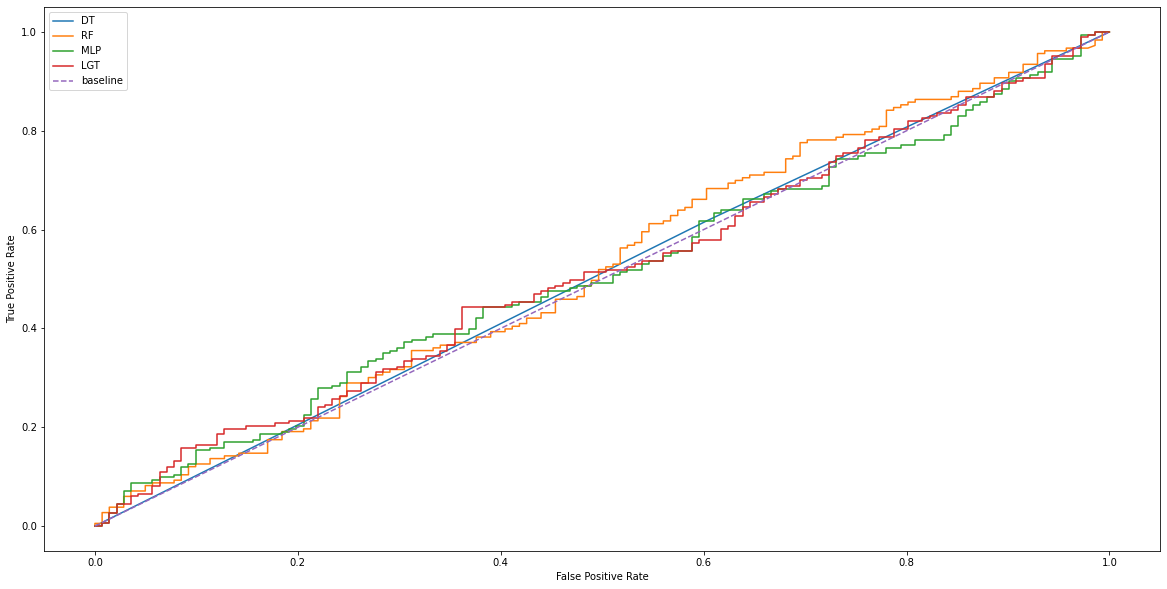

In [186]:
visualize_roc_auc()

## Regression -- DJI

In [187]:
DJI

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,
2016-10-14,18138.380859,18241.589974,45.627584,-43.253189,4.138200e+08,-0.927289,-59.448434,170.027087,18352.619648,17643.136929,18352.619648,17643.136929,24.942769,18086.400391,0
2016-10-17,18086.400391,18228.071289,43.673836,-48.657922,3.378600e+08,-0.917336,-71.261863,164.972278,18343.477070,17646.443784,18343.477070,17646.443784,25.286464,18161.939453,1
2016-10-18,18161.939453,18215.531966,47.211345,-46.311984,4.124600e+08,-0.035830,-54.094351,163.145715,18336.130078,17651.508784,18336.130078,17651.508784,25.028473,18202.619141,1
2016-10-19,18202.619141,18204.747917,49.066506,-40.701124,5.005000e+08,-0.428915,-44.849214,157.939575,18329.521445,17656.728579,18329.521445,17656.728579,24.553264,18162.349609,0
2016-10-20,18162.349609,18194.162565,47.294618,-39.053705,4.116700e+08,-0.581057,-54.001136,155.228211,18322.855234,17663.007778,18322.855234,17663.007778,24.360088,18145.710938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,34022.039062,35742.340625,27.377423,-221.014098,3.893157e+10,-5.866213,-99.348008,411.595782,35284.660781,34360.943242,35284.660781,34360.943242,25.744965,34639.789062,1
2021-12-02,34639.789062,35710.022266,39.229887,-251.947197,3.939847e+10,-3.593721,-72.601287,434.882467,35292.290156,34376.675488,35292.290156,34376.675488,28.132745,34580.078125,0
2021-12-03,34580.078125,35675.922266,38.574552,-278.074603,3.895892e+10,-3.598653,-75.186591,442.157883,35288.595313,34392.104277,35288.595313,34392.104277,30.153469,35227.031250,1


In [188]:
selected_features_rfe = selectFeature(DJI, 'future_close')
selected_features_rfe

['MA', 'MACD', 'ROC', 'W%R', 'SMA50', 'ADX']

In [189]:
# Split the dataset into the Training set and Test set
#
X = DJI.loc[:, selected_features_rfe]
y = DJI["future_close"]

from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Linear Regression -- DJI

In [190]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred


array([25962.23456016, 26073.30332783, 29719.20887241, 22518.92153338,
       34417.88099996, 25582.69147703, 35082.68000167, 26968.10257256,
       27552.41009797, 21589.59770594, 34190.61983777, 28921.49764793,
       33964.18810492, 34777.51424431, 25328.87899586, 34632.08292314,
       29356.09465787, 27272.15647839, 26356.47425323, 26583.404157  ,
       25738.56466242, 19932.36836   , 23598.28777499, 35254.28895725,
       18048.51479884, 21090.6462701 , 33154.52262411, 24864.25646051,
       24857.63430001, 27180.97829331, 19208.89120515, 30907.71740892,
       25340.23469931, 23979.08885532, 26841.08563151, 35172.03580961,
       28432.15119362, 26181.70946078, 28117.0353005 , 25743.76771589,
       30050.46057887, 21069.5960078 , 19771.59980077, 34716.14813968,
       28425.02357721, 35416.9004062 , 26940.56826239, 34564.26345645,
       23579.6596563 , 25547.97101942, 31559.03728592, 25174.1406795 ,
       20027.14906174, 24587.85422843, 25018.60532759, 34295.57432546,
      

In [191]:
y_test

Date
2020-07-07    26067.279297
2018-09-04    25974.990234
2020-11-13    29950.439453
2017-09-28    22405.089844
2021-10-11    34378.339844
                  ...     
2017-02-13    20504.410156
2018-10-26    24442.919922
2020-02-20    28992.410156
2019-12-18    28376.960938
2018-08-22    25656.980469
Name: future_close, Length: 324, dtype: float64

In [192]:
Accuracy_regress(y_test, y_pred)

RMSE:  397.3906550616868
R2 Score:  0.9921172256908577


In [193]:
previous_close = y_pred[-2]
previous_close

28413.488401706443

In [194]:
next_close = y_pred[-1]
next_close

25762.961239264507

In [195]:
PredictAllRegress(next_close, previous_close, y_pred)

Today predict is DOWN!
one:  1154
zero:  1124
this Regression predict is UP


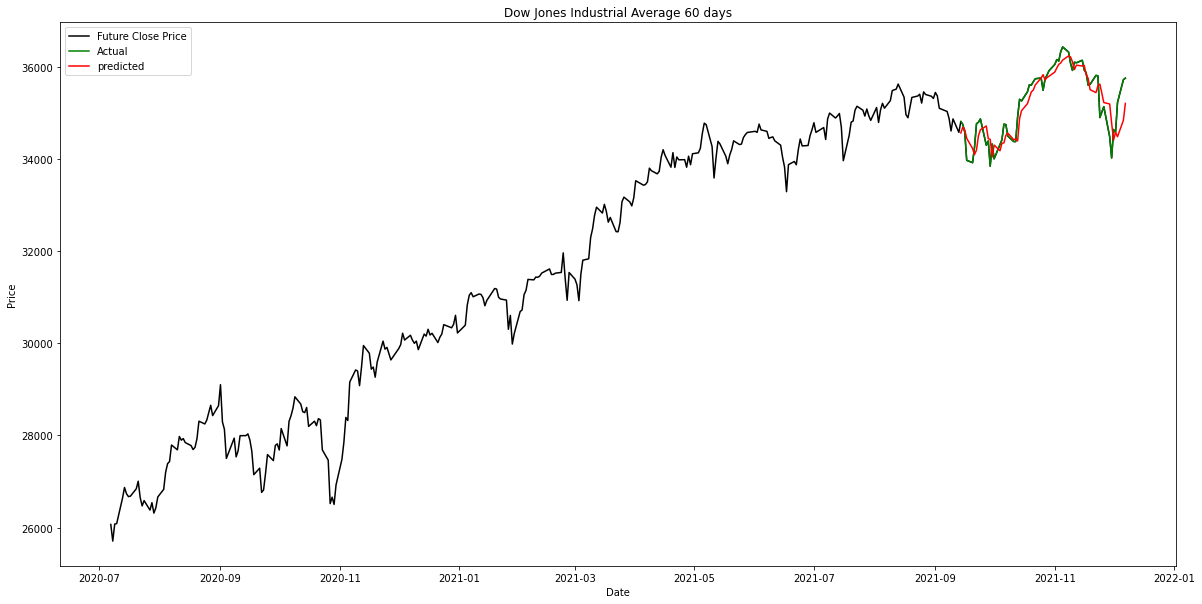

In [196]:
plotgraphReg('Dow Jones Industrial Average 60 days', DJI.index, y , DJI.iloc[-60:], selected_features_rfe, lr)

## AdaBoostRegressor-- DJI

In [197]:
X = DJI.loc[:, selected_features_rfe]
y = DJI["future_close"]
X

,MA,MACD,ROC,W%R,SMA50,ADX
Date,,,,,,
2016-10-14,18241.589974,-43.253189,-0.927289,-59.448434,18352.619648,24.942769
2016-10-17,18228.071289,-48.657922,-0.917336,-71.261863,18343.477070,25.286464
2016-10-18,18215.531966,-46.311984,-0.035830,-54.094351,18336.130078,25.028473
2016-10-19,18204.747917,-40.701124,-0.428915,-44.849214,18329.521445,24.553264
2016-10-20,18194.162565,-39.053705,-0.581057,-54.001136,18322.855234,24.360088
...,...,...,...,...,...,...
2021-12-01,35742.340625,-221.014098,-5.866213,-99.348008,35284.660781,25.744965
2021-12-02,35710.022266,-251.947197,-3.593721,-72.601287,35292.290156,28.132745
2021-12-03,35675.922266,-278.074603,-3.598653,-75.186591,35288.595313,30.153469


In [198]:
DJI

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,ADX,future_close,Updown
Date,,,,,,,,,,,,,,,
2016-10-14,18138.380859,18241.589974,45.627584,-43.253189,4.138200e+08,-0.927289,-59.448434,170.027087,18352.619648,17643.136929,18352.619648,17643.136929,24.942769,18086.400391,0
2016-10-17,18086.400391,18228.071289,43.673836,-48.657922,3.378600e+08,-0.917336,-71.261863,164.972278,18343.477070,17646.443784,18343.477070,17646.443784,25.286464,18161.939453,1
2016-10-18,18161.939453,18215.531966,47.211345,-46.311984,4.124600e+08,-0.035830,-54.094351,163.145715,18336.130078,17651.508784,18336.130078,17651.508784,25.028473,18202.619141,1
2016-10-19,18202.619141,18204.747917,49.066506,-40.701124,5.005000e+08,-0.428915,-44.849214,157.939575,18329.521445,17656.728579,18329.521445,17656.728579,24.553264,18162.349609,0
2016-10-20,18162.349609,18194.162565,47.294618,-39.053705,4.116700e+08,-0.581057,-54.001136,155.228211,18322.855234,17663.007778,18322.855234,17663.007778,24.360088,18145.710938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,34022.039062,35742.340625,27.377423,-221.014098,3.893157e+10,-5.866213,-99.348008,411.595782,35284.660781,34360.943242,35284.660781,34360.943242,25.744965,34639.789062,1
2021-12-02,34639.789062,35710.022266,39.229887,-251.947197,3.939847e+10,-3.593721,-72.601287,434.882467,35292.290156,34376.675488,35292.290156,34376.675488,28.132745,34580.078125,0
2021-12-03,34580.078125,35675.922266,38.574552,-278.074603,3.895892e+10,-3.598653,-75.186591,442.157883,35288.595313,34392.104277,35288.595313,34392.104277,30.153469,35227.031250,1


In [199]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = DJI.loc[:, selected_features_rfe]
y = DJI["future_close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [200]:
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=50,learning_rate=0.1,random_state=0).fit(X_train, y_train)

In [201]:
y_pred = ada.predict(X_test)
y_pred


array([25677.90069568, 25196.6974468 , 27802.08872768, 21419.82474705,
       35181.33376025, 25153.39220924, 35181.33376025, 25677.90069568,
       26883.58427608, 21392.08401588, 34095.11574519, 27079.55892041,
       34020.24499199, 35184.21759816, 25153.39220924, 35184.21759816,
       28635.3992343 , 25894.05532512, 25894.05532512, 25677.90069568,
       27079.55892041, 19324.83655754, 25021.2297789 , 35184.21759816,
       19303.81981594, 21327.86057456, 32862.85135691, 25153.39220924,
       25153.39220924, 26496.5115733 , 19303.81981594, 30659.60369318,
       25153.39220924, 25104.98928321, 25677.90069568, 35184.21759816,
       27115.3975145 , 25153.39220924, 27115.3975145 , 25677.90069568,
       30072.57417675, 21327.86057456, 19324.83655754, 35184.21759816,
       27236.45128038, 35184.21759816, 25894.05532512, 35184.21759816,
       25021.2297789 , 25677.90069568, 31005.3123122 , 25153.39220924,
       19324.83655754, 25153.39220924, 25153.39220924, 35181.33376025,
      

In [202]:
Accuracy_regress(y_test, y_pred)

RMSE:  834.1977587143225
R2 Score:  0.9652638381580723


In [203]:
next_close = y_pred[-1]
next_close

25153.392209244532

In [204]:
previous_close = y_pred[-2]
previous_close

27236.451280381945

In [205]:
PredictAllRegress(next_close, previous_close, y_pred)

Today predict is DOWN!
one:  1304
zero:  1298
this Regression predict is UP


In [206]:
FinalPredict()

This stock should sell
zero_class:  65
one_class:  1231
zero_regress:  1298
one_regress:  1304


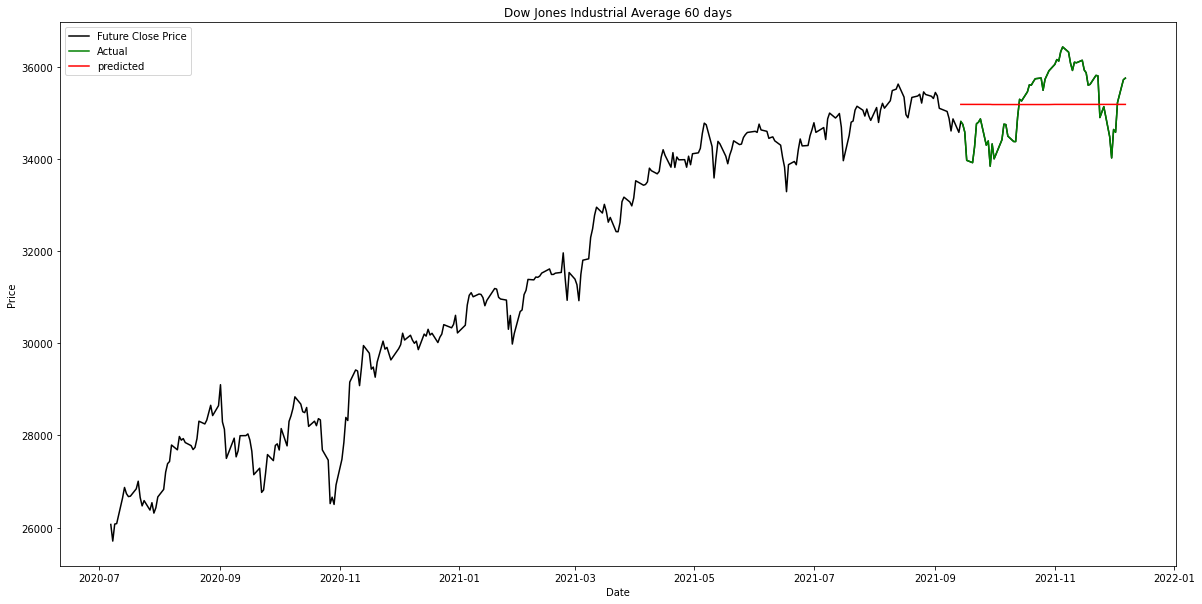

In [207]:
plotgraphReg('Dow Jones Industrial Average 60 days', DJI.index, y , DJI.iloc[-60:], selected_features_rfe, ada)